# Ellipsoid Problem

Given an ellipsoid $E_0 = \{x \in \mathbb{R}^p: -x^T Q_0 x + b_0^T x + c_0 \ge 0, Q_0 \in \mathbb{S}^p_+, b_0 \in \mathbb{R}^p, c_0 \in \mathbb{R}\}$, a map $\varphi: \mathbb{R}^p \rightarrow \mathbb{R}^p, x \mapsto \max\{0,Px + \xi\}$. The goal is to find an ellipsoid $E = \{x \in \mathbb{R}^p: -x^T Q x + b^T x + c \ge 0, Q \in \mathbb{S}^p_+, b \in \mathbb{R}^p, c \in \mathbb{R}\}$ such that $\varphi (E_0) \subseteq E$. For the following discussion, the product between two vectors means element-wise product, i.e. $ab := \sum_{i = 1}^n a_i b_i$ for $a, b \in \mathbb{R}^n$.

It is easy to see that for all $x \in \mathbb{R}^p$ such that $-x^T Q_0 x + b_0^T x + c_0 \ge 0$, we have $-\max\{0,Px + \xi\}^T Q \max\{0,Px + \xi\} + b^T \max\{0,Px + \xi\} + c \ge 0$, which is equivalent to $-z^T Q z + b^T z + c \ge 0, z(z-Px - \xi) = 0, z \ge 0, z \ge Px + \xi$.

We have the following polynomial optimization problem:
\begin{align*}
\text{find} & \quad Q, b, c \\
\text{s.t.} & \quad \begin{cases} -x^T Q_0 x + b_0^T x + c_0 \ge 0 \\
-z^T Q z + b^T z + c \ge 0, Q \in \mathbb{S}^p_+ \\
z(z-Px - \xi) = 0, z \ge 0, z \ge Px + \xi \end{cases}
\end{align*}
By maximizing the trace of $Q$, we can use Julia to solve this POP. For simplicity, let $Q_0 = \text{diag}\{1,1\}, b_0 = (0,0)^T, c_0 = 0$.

The $d$-th order SOS problem is
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad \begin{cases}
-z^T Q z + b^T z + c = \sigma_0 (x, z) +  \sigma_1 (x, z) (-x^T Q_0 x + b_0^T x + c_0) + \tau (x,z)^T (z(z-Px - \xi)) + \sigma_2 (x,z)^T z + \sigma_3 (x,z)^T (z - Px - \xi) \\
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0, \sigma_1 \text{ SOS}; \sigma_i = [\sigma_i^1, \ldots, \sigma_i^p]^T \text{ SOSs for } i = 2,3; \tau \text{ polynomial}
\end{cases}
\end{align*}

An alternative:
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad \begin{cases}
-(\frac{z+Px+\xi}{2})^T Q (\frac{z+Px+\xi}{2}) + b^T (\frac{z+Px+\xi}{2}) + c = \sigma_0 (x, z) +  \sigma_1 (x, z) (-x^T Q_0 x + b_0^T x + c_0) + \tau (x,z)^T (z^2-(Px + \xi)^2) + \sigma_2 (x,z)^T z \\
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0, \sigma_1 \text{ SOS}; \sigma_2 = [\sigma_2^1, \ldots, \sigma_2^p]^T \text{ SOSs}; \tau \text{ polynomial}
\end{cases}
\end{align*}

Instead of propagating the ellipsoids layer by layer, we can also estimate the final outer ellipsoid directly, which leads to the following SOS problem:
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad \begin{cases}
-x_l^T Q x_l + b^T x_l + c = \sigma_0 (x, x_{1 \ldots l}) +  \sigma_1 (x, x_{1 \ldots l}) (-x^T Q_0 x + b_0^T x + c_0) \\
\qquad \qquad + \tau_1 (x, x_{1 \ldots l})^T (x_1(x_1-P_1 x - \xi_1)) + \sigma_{1,1} (x, x_{1 \ldots l})^T x_1 + \sigma_{1,2} (x, x_{1 \ldots l})^T (x_1 - P_1 x - \xi_1) \\
\qquad \qquad + \tau_2 (x, x_{1 \ldots l})^T (x_2(x_2-P_2 x_1 - \xi_2)) + \sigma_{2,1} (x, x_{1 \ldots l})^T x_2 + \sigma_{2,2} (x, x_{1 \ldots l})^T (x_2 - P_2 x_1 - \xi_2) \\
\qquad \qquad + \ldots \\
\qquad \qquad + \tau_l (x, x_{1 \ldots l})^T (x_l(x_l-P_l x_{l-1} - \xi_l)) + \sigma_{l,1} (x, x_{1 \ldots l})^T x_l + \sigma_{l,2} (x, x_{1 \ldots l}, x_{1 \ldots l})^T (x_l - P_l x_{l-1} - \xi_l) \\
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0, \sigma_0, \sigma_1, \sigma_{i,j} = [\sigma_{i,j}^1, \ldots, \sigma_{i,j}^{p_i}]^T \text{ SOSs}, \tau_i = [\tau_i^1, \ldots, \tau_i^{p_i}]^T \text{ polynomials}
\end{cases}
\end{align*}

The goal is to beat Morari, by applying multi-order and sublevel hierarchy either to the propagation SOS problem or the single-shot SOS problem. We use a heuristic $s$-sublevel (choose the sublevels by cycle) as follows: $\{x^i, \ldots, x^{s+i-1}\}$ for the input ellipsoid $-x^T Q_0 x + b_0^T x + c_0$, $\{x_{k-1}^i, \ldots, x_{k-1}^{s+i-1}, z_k^j\}$ for the ReLU constraints $z_k^j (z_k^j-P_k^{j,:} x_{k-1} - \xi_k^j)$, $z_k^j-P_k^{j,:} x_{k-1} - \xi_k^j$ and $z_k^j$, $\{x_{k-1}^i, \ldots, x_{k-1}^{s+i-1}, z_k^j, z_k^t\}$ for the non-linearity constraints $((z_k^j - z_k^t)^2 - (z_k^j - z_k^t) (P_k^{j,:} x_{k-1} + \xi_k^j - P_k^{t,:} x_{k-1} - \xi_k^t))$ with the convention that $x_k^{p_k+i} = x_k^i$. The 2nd-order $s$-sublevel hierarchy for ellipsoid problem reads as follows (by adding the redundant non-linearity constraints):
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad \begin{cases}
-x_l^T Q x_l + b^T x_l + c = \sigma_0 (x, x_{1 \ldots l}) + \displaystyle \sum_{i=1}^{p} \sigma_1^i (x^{i, \ldots, s+i-1}) (-x^T Q_0 x + b_0^T x + c_0) \\
\qquad\qquad\qquad + \displaystyle \sum_{i=1}^{p}\sum_{j = 1}^{p_1} \big(\sigma_{1,0}^{i,j} (x^{i,\ldots, s+i-1}, x_1^j) + \tau_1^{i,j} (x^{i,\ldots, s+i-1}, x_1^j) (x_1^j(x_1^j-P_1^{j,:} x - \xi_1^j)) \\
\qquad\qquad\qquad\qquad\qquad + \sigma_{1,1}^{i,j} (x^{i,\ldots, s+i-1}, x_1^j) x_1^j + \sigma_{1,2}^{i,j} (x^{i,\ldots, s+i-1}, x_1^j) (x_1^j-P_1^{j,:} x - \xi_1^j)\big) \\
\qquad\qquad\qquad - \displaystyle \sum_{i = 1}^{p} \sum_{j = 1}^{p_1 - 1} \sum_{t = j+1}^{p_1} \lambda_1^{j,t}(x^{i,\ldots, s+i-1}, x_1^j, x_1^t) ((x_1^j - x_1^t)^2 - (x_1^j - x_1^t) (P_1^{j,:} x + \xi_1^j - P_1^{t,:} x - \xi_1^t))\\
\qquad\qquad\qquad + \displaystyle \sum_{i = 1}^{p_1} \sum_{j = 1}^{p_2} \big( \sigma_{2,0}^{i,j} (x_1^{i, \ldots, s+i-1}, x_2^j) + \tau_2^{i,j} (x_1^{i, \ldots, s+i-1}, x_2^j) (x_2^j(x_2^j-P_2^{j,:} x_1 - \xi_2^j)) \\
\qquad\qquad\qquad\qquad\qquad + \sigma_{2,1}^{i,j} (x_1^{i, \ldots, s+i-1}, x_2^j) x_2^j + \sigma_{2,2}^{i,j} (x_1^{i, \ldots, s+i-1}, x_2^j) (x_2^j-P_2^{j,:} x_1 - \xi_2^j)\big) \\
\qquad\qquad\qquad - \displaystyle \sum_{i = 1}^{p_1} \sum_{j = 1}^{p_2 - 1} \sum_{t = j+1}^{p_2} \lambda_2^{j,t}(x_1^{i,\ldots, s+i-1}, x_2^j, x_2^t) ((x_2^j - x_2^t)^2 - (x_2^j - x_2^t) (P_2^{j,:} x_1 + \xi_2^j - P_2^{t,:} x_1 - \xi_2^t))\\
\qquad\qquad\qquad + \ldots \\
\qquad\qquad\qquad + \displaystyle \sum_{i = 1}^{p_{l-1}} \sum_{j = 1}^{p_l} \big( \sigma_{l,0}^{i,j} (x_{l-1}^{i, \ldots, s+i-1}, x_l^j) + \tau_l^{i,j} (x_{l-1}^{i, \ldots, s+i-1}, x_l^j) (x_l^j(x_l^j-P_l^{j,:} x_{l-1} - \xi_l^j))\\
\qquad\qquad\qquad\qquad\qquad + \sigma_{l,1}^{i,j} (x_{l-1}^{i, \ldots, s+i-1}, x_l^j) x_l^j + \sigma_{l,2}^{i,j} (x_{l-1}^{i, \ldots, s+i-1}, x_l^j) (x_l^j-P_l^{j,:} x_{l-1} - \xi_l^j)\big) \\
\qquad\qquad\qquad - \displaystyle \sum_{i = 1}^{p_{l-1}} \sum_{j = 1}^{p_l - 1} \sum_{t = j+1}^{p_l} \lambda_l^{j,t}(x_{l-1}^{i,\ldots, s+i-1}, x_l^j, x_l^t) ((x_l^j - x_l^t)^2 - (x_l^j - x_l^t) (P_l^{j,:} x_{l-1} + \xi_l^j - P_l^{t,:} x_{l-1} - \xi_l^t))\\
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0, \sigma_0, \sigma_1^i, \sigma_{s,t}^{i,j} \text{ SOSs}, \tau_s^{i,j} \text{ polynomials}
\end{cases}
\end{align*}

# Morari = Shor
## QC for hyper-rectangle
The hyper-rectangle $\mathcal{X} = \{x \in \mathbb{R}^d: \underline{x} \le x \le \overline{x}\}$ satisfies the QC defined by
$$P = \begin{bmatrix}-(\Gamma+\Gamma^T) & \Gamma \underline{x} + \Gamma^T \overline{x} \\
\underline{x}^T \Gamma^T + \overline{x}^T \Gamma & - \underline{x}^T \Gamma^T \overline{x} - \overline{x}^T \Gamma \underline{x} \end{bmatrix}$$
where $\Gamma \in \mathbb{R}^{d\times d}, \Gamma_{ij} \ge 0 $ for all $i, j$. This is equivalent to say that
$$\sum_{i,j} \Gamma_{ij} (x_i - \underline{x}_i) (\overline{x}_j - x_j) \ge 0$$

## QC for ReLU function
The ReLU function $y=\max\{0, x\}$ satisfies the QC defined by
$$Q = \begin{bmatrix}
\mathbf{0}_{d\times d} & T & -\nu \\
T & -2T & \nu + \eta \\
-\nu^T & \nu^T + \eta^T & 0
\end{bmatrix}$$
where $\eta, \nu \ge 0$ and $T \in \mathbb{S}^d_+$ given by
$$T = \sum_{i = 1}^d \lambda_i e_i e_i^T + \sum_{i < j} \lambda_{ij} (e_i - e_j) (e_i - e_j)^T$$
with $\lambda_i \in \mathbb{R}$ and $\lambda_{ij} \ge 0$. This is equivalent to say that
$$\sum_{i = 1}^d 2 \lambda_i (x_i y_i - y_i^2) + \nu_i (y_i - x_i) + \eta_i y_i - \sum_{i < j} \lambda_{ij} \big((y_j - y_i)^2 - (y_j - y_i)(x_j - x_i)\big) \ge 0$$

## QC for polytope
A polytope $\mathcal{X} = \{x\in \mathbb{R}^d : Ax \le b\}$ satisfies the QC defined by
$$P = \begin{bmatrix}A^T \Gamma A & -A^T \Gamma b \\
-b^T \Gamma A & b^T \Gamma b\end{bmatrix}$$
where $\Gamma \in \mathbb{S}^d, \Gamma \ge 0$. This is equivalent to say that
$$\sum_{i,j} \Gamma_{ij} (b_i - A_{i,:} x) (b_j - A_{j,:} x) \ge 0$$

## QC for ellipsoid
An ellipsoid $\mathcal{X} = \{x \in\mathbb{R}^d: ||Ax + b||_2 \le 1\}$ satisfies the QC defined by
$$P = \mu \begin{bmatrix}
-A^T A & -A^T b\\
-b^T A & 1- b^T b\end{bmatrix}$$
where $\mu \ge 0$. This is equivalent to say that
$$\mu (1- ||Ax + b||_2^2) \ge 0$$

## QC for polytopic reachable set
A polytope $\mathcal{X} =\{x \in \mathbb{R}^d: Ax \le b\} = \cap_{i = 1}^d \{x \in \mathbb{R}^d: A_{i,:} x \le b_i\}$ satisfies the QC defined by
$$S_i = \begin{bmatrix}\mathbf{0}_{d\times d}& A_{i,:}^T \\ A_{i,:} & -2b_i\end{bmatrix}$$
where $A$ (which determines the orientation of each facet of the polytope) is given, $b$ is decision variable. This is equivalent to say that
$$2 A_{i,:} x - 2 b_i \le 0$$

## QC for ellipsoidal reachable set
An ellipsoid $\mathcal{X} = \{x \in\mathbb{R}^d: ||Ax + b||_2 \le 1\}$ satisfies the QC defined by
$$P = \begin{bmatrix}
A^T A & A^T b\\
b^T A & b^T b - 1\end{bmatrix}$$
where $A,b$ are decision variables. This is equivalent to say that 
$$||Ax + b||_2^2 - 1 \le 0$$

## Conclusion
The first-order moment relaxation (Shor's relaxation) reads:
$$-\sigma_0 (x, z) = \underbrace{\overbrace{z^T Q z - b^T z - c}^{p_1(x,z)} + \overbrace{\sigma_1 (-x^T Q_0 x + b_0^T x + c_0)}^{p_2(x,z)} + \overbrace{\tau^T (z(z-Px - \xi))}^{p_3(x,z)} + \overbrace{\sigma_2^T z}^{p_4(x,z)} + \overbrace{\sigma_3^T (z - Px - \xi)}^{p_5(x,z)}}_{q(x,z)} =: \begin{bmatrix}x\\z\\1\end{bmatrix}^T M \begin{bmatrix}x\\z\\1\end{bmatrix}$$
where $M$ is the Gram matrix of $q(x,z)$ with basis $(x^T,z^T,1)$, $\sigma_0$ is an SOS of degree 2, $\sigma_1 \in \mathbb{R}_+, \tau \in \mathbb{R}^{p_1}, \sigma_2 \in \mathbb{R}^{p_1}_+, \sigma_3 \in \mathbb{R}^{p_1}_+$. Precisely, $M = M_1 + M_2 + M_3 + M_4 + M_5$, where
$$M_1 = \begin{bmatrix}
\mathbf{0}_{p\times p} & \mathbf{0}_{p\times p_1} & \mathbf{0}_{p\times 1} \\
\mathbf{0}_{p_1 \times p} & Q & -\frac{1}{2} b \\
\mathbf{0}_{1 \times p} & -\frac{1}{2} b^T & -c \end{bmatrix}$$
is the Gram matrix of polynomial $p_1(x,z) = z^T Q z - b^T z - c$ with basis $(x^T,z^T,1)$,
$$M_2 = \sigma_1 \begin{bmatrix}
-Q_0 & \mathbf{0}_{p\times p_1} & \frac{1}{2} b_0 \\
\mathbf{0}_{p_1 \times p} & \mathbf{0}_{p_1 \times p_1} & \mathbf{0}_{p_1 \times 1} \\
\frac{1}{2} b_0^T & \mathbf{0}_{1\times p_1} & c_0 \\
\end{bmatrix}$$
is the Gram matrix of polynomial $p_2(x,z) = \sigma_1 (-x^T Q_0 x + b_0^T x + c_0)$ with basis $(x^T,z^T,1)$,
$$M_3 = \begin{bmatrix}
\mathbf{0}_{p\times p} & -\frac{1}{2} P^T \text{diag}(\tau) & \mathbf{0}_{p\times 1} \\
-\frac{1}{2} \text{diag}(\tau) P & \text{diag}(\tau) & -\frac{1}{2} (\tau \xi) \\
\mathbf{0}_{1 \times p} & -\frac{1}{2} (\tau^T \xi^T) & 0
\end{bmatrix}$$
is the Gram matrix of polynomial $p_3(x,z) = \tau z(z-Px - \xi)$ with basis $(x^T,z^T,1)$,
$$M_4 = \begin{bmatrix}
\mathbf{0}_{p\times p} & \mathbf{0}_{p\times p_1} & \mathbf{0}_{p\times 1} \\
\mathbf{0}_{p_1 \times p} & \mathbf{0}_{p_1 \times p_1} & \frac{1}{2} \sigma_2 \\
\mathbf{0}_{1 \times p} & \frac{1}{2} \sigma_2^T & 0
\end{bmatrix}$$
is the Gram matrix of polynomial $p_4(x,z) = \sigma_2 z$ with basis $(x^T,z^T,1)$,
$$M_5 = \begin{bmatrix}
\mathbf{0}_{p\times p} & \mathbf{0}_{p\times p_1} & -\frac{1}{2} P^T \sigma_3 \\
\mathbf{0}_{p_1 \times p} & \mathbf{0}_{p_1 \times p_1} & \frac{1}{2} \sigma_3 \\
-\frac{1}{2} \sigma_3^T P & \frac{1}{2} \sigma_3^T & -\sigma_3^T \xi
\end{bmatrix}$$
is the Gram matrix of polynomial $p_5(x,z) = \sigma_3 (z - Px - \xi)$ with basis $(x^T,z^T,1)$.

If we add the redundant constraints $(z_j - z_i)^2 - (z_j - z_i) (P_{j,:} x + \xi_j - P_{i,:} x - \xi_i) \le 0$ for $i<j$. Then we just need to add additional polynomials $-\sum_{i<j} \Lambda_{ij} ((z_j - z_i)^2 - (z_j - z_i) (P_{j,:} x + \xi_j - P_{i,:} x - \xi_i))$ with $\Lambda \ge 0$, correspondingly, add its Gram matrix $M_6$ to $M$:
$$M_6 = \begin{bmatrix}
\mathbf{0}_{p\times p} & \frac{1}{2} P^T T & \mathbf{0}_{p\times 1} \\
\frac{1}{2} T P & -T & \frac{1}{2} T \xi \\
\mathbf{0}_{1 \times p} & \frac{1}{2} \xi^T T & 0
\end{bmatrix}$$
with $T = \sum_{i<j} \Lambda_{ij} (\mathbf{e}_i - \mathbf{e}_j) (\mathbf{e}_i - \mathbf{e}_j)^T$ and $\mathbf{e}_i$ are the canonical basis in $\mathbb{R}^p$.

Then Morari's method (applied to the ellipsoid problem) is essentially the following SDP problem:
\begin{align*}
\max & \quad \det (Q) ^{\frac{1}{p}} \\
\text{s.t.} & \quad
M \preceq 0, 
\begin{pmatrix}
Q & \frac{1}{2} b \\
\frac{1}{2} b^T & 1-c
\end{pmatrix} \succeq 0
\end{align*}
We can see that Morari's method is just a different reformulation of Shor's relaxation.

# Theorem (Image of an Ellipsoid by an Affine Map)
Let $E = \{x \in \mathbb{R}^p: -x^T Q x + b^T x + c \ge 0, Q \in \mathbb{S}^p_+, b \in \mathbb{R}^p, c \in \mathbb{R}\}$ be an ellipsoid in $\mathbb{R}^p$. Define an affine map $\mathcal{A}: \mathbb{R}^p \rightarrow \mathbb{R}^q$, $x \mapsto z = Px+\xi$, where $P \in \mathbb{R}^{q \times p}, \xi \in \mathbb{R}^q$. Then the image of $E$ under $\mathcal{A}$ is:

i) An ellipsoid in $\mathbb{R}^q$, if $\text{rank}(P) = q$;

ii) An ellipsoid in a subspace of $\mathbb{R}^q$, if $\text{rank}(P) < q$, where the dimension of the subspace equals to $\text{rank}(P)$.

The way to determine the image of the ellipsoid $E$ under $\mathcal{A}$ is as follows. Let $P = U \Sigma V^T$ be the SVD decomposition of $P$. Denote by 
$$U = \begin{pmatrix} U_r & U_{q-r} \end{pmatrix}, \Sigma = \begin{pmatrix} \Sigma_r & \mathbf{0}_{r, p-r} \\ \mathbf{0}_{q-r, r} & \mathbf{0}_{q-r, p-r} \end{pmatrix}, V^T = \begin{pmatrix} V_r^T \\ V_{p-r}^T \end{pmatrix}$$
where $\Sigma_r = \text{diag} \{\lambda_1, \ldots, \lambda_r\}, \lambda_i \ne 0, i = 1, \ldots, r, r = \text{rank}(P)$. Note that $P = U \Sigma V^T = U_r \Sigma_r V_r^T$. Denote by $P^{(-1)} = V_r \Sigma_r^{-1} U_r^T$ and $P^{(-T)} = U_r \Sigma_r^{-1} V_r^T$. Then, the image of $E$ under $\mathcal{A}$ satisfying the following equation:
$$\begin{cases} -(z - \xi)^T Q' (z - \xi) + b'^T (z - \xi) + c \ge 0 \\
U_{q-r}^T (z - \xi) = 0\end{cases}$$
with $Q' = P^{(-T)} Q P^{(-1)}, b' = P^{(-T)} b$.

# Numerical Experiments

In [1]:
using Plots
using SumOfSquares
using DynamicPolynomials
using MosekTools
using LinearAlgebra
using Printf
using MathOptInterface
using StatsBase

# compute the outer approximation ellipsoid
function OuterApproximation(Q0, b0, c0, ord, P, ξ, method)
    p1 = size(P, 2); p2 = size(P, 1)
    model = SOSModel(with_optimizer(Mosek.Optimizer))
    # objective variable
    Q = @variable(model, [1:p2, 1:p2], Symmetric);
    b = @variable(model, [1:p2, 1:1]);
    c = @variable(model, [1:1, 1:1]);
    if isequal(method, "tong")
        @polyvar x[1:p1] z[1:p2] lower_bound
        @variable(model, lower_bound)
        @objective(model, Max, lower_bound)
        Mat = [-Q b/2; b'/2 1-c[1]];
        vect = lower_bound
        for i = 1:p2
            vect = hcat(vect, -Q[i,i:p2]')
        end
        @constraints(model, begin
            Mat in PSDCone()
            vect[:] in MOI.RootDetConeTriangle(p2)
        end)
        X0 = monomials([x; z], 0:2*ord); σ0 = @variable(model, [1:1], Poly(X0))
        X1 = monomials([x; z], 0:2*(ord-1)); σ1 = @variable(model, [1:1], Poly(X1))
        obj = z'*Q*z.+b'*z.+c - σ0[1] - σ1[1] * (x'*Q0*x.+b0'*x.+c0)
        Λ = @variable(model, [1:p2,1:p2], Symmetric)
        for i = 1:p2-1
            for j = i+1:p2
                obj = obj + Λ[i,j]*((z[j] - z[i])^2 - (z[j] - z[i])*(P[j,:]'*x + ξ[j] - P[i,:]'*x - ξ[i]))
            end
        end
        @constraints(model, begin
            σ0 .>= 0; σ1 .>= 0; Λ .>= 0
        end)
        for i = 1:p2
            X2 = monomials([x; z], 0:2*(ord-1)); σ2 = @variable(model, [1:1], Poly(X2))
            X3 = monomials([x; z], 0:2*(ord-1)); σ3 = @variable(model, [1:1], Poly(X3))
            X4 = monomials([x; z], 0:2*(ord-1)); σ4 = @variable(model, [1:1], Poly(X4))
            obj = obj - σ2[1] * (z[i]*(z[i]-P[i,:]'*x-ξ[i])) - σ3[1] * z[i] - σ4[1] * (z[i]-P[i,:]'*x-ξ[i])
            @constraints(model, begin
                σ3 .>= 0; σ4 .>= 0;
            end)
        end
        # println("Shor:")
        # println((-obj-σ0[1])[1])
        @constraint(model, obj .== 0)
    elseif isequal(method, "split")
        @polyvar x[1:p2] z[1:p2] lower_bound
        @variable(model, lower_bound)
        @objective(model, Max, lower_bound)
        Mat = [-Q b/2; b'/2 1-c[1]];
        vect = lower_bound
        for i = 1:p2
            vect = hcat(vect, -Q[i,i:p2]')
        end
        @constraints(model, begin
            Mat in PSDCone()
            vect[:] in MOI.RootDetConeTriangle(p2)
        end)
        X0 = monomials([x; z], 0:2*ord); σ0 = @variable(model, [1:1], Poly(X0))
        X1 = monomials([x; z], 0:2*(ord-1)); σ1 = @variable(model, [1:1], Poly(X1))
        D = svd(P); Q0 = D.U*diagm(D.S)^(-1)*D.V'*Q0*D.V*diagm(D.S)^(-1)*D.U'; b0 = D.U*diagm(D.S)^(-1)*D.V'*b0; c0 = c0
        obj = z'*Q*z.+b'*z.+c - σ0[1] - σ1[1] * ((x-ξ)'*Q0*(x-ξ).+b0'*(x-ξ).+c0)
        Λ = @variable(model, [1:p2,1:p2], Symmetric)
        for i = 1:p2-1
            for j = i+1:p2
                obj = obj + Λ[i,j]*((z[j] - z[i])^2 - (z[j] - z[i])*(x[j] - x[i]))
            end
        end
        @constraints(model, begin
            σ0 .>= 0; σ1 .>= 0; Λ .>= 0
        end)
        for i = 1:p2
            X2 = monomials([x; z], 0:2*(ord-1)); σ2 = @variable(model, [1:1], Poly(X2))
            X3 = monomials([x; z], 0:2*(ord-1)); σ3 = @variable(model, [1:1], Poly(X3))
            X4 = monomials([x; z], 0:2*(ord-1)); σ4 = @variable(model, [1:1], Poly(X4))
            obj = obj - σ2[1] * (z[i]*(z[i]-x[i])) - σ3[1] * z[i] - σ4[1] * (z[i]-x[i])
            @constraints(model, begin
                σ3 .>= 0; σ4 .>= 0;
            end)
        end
        @constraint(model, obj .== 0)
    elseif isequal(method, "jean")
        @polyvar x[1:p1] z[1:p2] lower_bound
        @variable(model, lower_bound)
        @objective(model, Max, lower_bound)
        Mat = [-Q b/2; b'/2 1-c[1]];
        vect = lower_bound
        for i = 1:p2
            vect = hcat(vect, -Q[i,i:p2]')
        end
        @constraints(model, begin
            Mat in PSDCone()
            vect[:] in MOI.RootDetConeTriangle(p2)
        end)
        X0 = monomials([x; z], 0:2*ord); σ0 = @variable(model, [1:1], Poly(X0))
        X1 = monomials([x; z], 0:2*(ord-1)); σ1 = @variable(model, [1:1], Poly(X1))
        obj = 1/4*(z+P*x+ξ)'*Q*(z+P*x+ξ).+1/2*b'*(z+P*x+ξ).+c - σ0[1] - σ1[1] * (x'*Q0*x.+b0'*x.+c0)
        @constraints(model, begin
            σ0 .>= 0; σ1 .>= 0;
        end)
        for i = 1:p2
            X2 = monomials([x; z], 0:2*(ord-1)); σ2 = @variable(model, [1:1], Poly(X2))
            X3 = monomials([x; z], 0:2*(ord-1)); σ3 = @variable(model, [1:1], Poly(X3))
            obj = obj - σ2[1] * (z[i]^2-(P[i,:]'*x+ξ[i])^2) - σ3[1] * z[i]
            @constraints(model, begin
                σ3 .>= 0;
            end)
        end
        @constraint(model, obj .== 0)
    elseif isequal(method, "hr-2")
        @polyvar x[1:p2] z[1:p2] lower_bound
        @variable(model, lower_bound)
        @objective(model, Max, lower_bound)
        Mat = [-Q b/2; b'/2 1-c[1]];
        vect = lower_bound
        for i = 1:p2
            vect = hcat(vect, -Q[i,i:p2]')
        end
        @constraints(model, begin
            Mat in PSDCone()
            vect[:] in MOI.RootDetConeTriangle(p2)
        end)
        X0 = monomials([x; z], 0:2*1); σ0 = @variable(model, [1:1], Poly(X0))
        X01 = monomials(x, 0:2*ord); σ01 = @variable(model, [1:1], Poly(X01))
        X1 = monomials(x, 0:2*(ord-1)); σ1 = @variable(model, [1:1], Poly(X1))
        obj = z'*Q*z.+b'*z.+c - σ0[1] - σ01[1] - σ1[1] * (x'*Q0*x.+b0'*x.+c0)
        Λ = @variable(model, [1:p2,1:p2], Symmetric)
        for i = 1:p2-1
            for j = i+1:p2
                if i != j
                    obj = obj + Λ[i,j]*((z[j] - z[i])^2 - (z[j] - z[i])*(P[j,:]'*x + ξ[j] - P[i,:]'*x - ξ[i]))
                end
            end
        end
        @constraints(model, begin
            σ0 .>= 0; σ01 .>= 0; σ1 .>= 0; Λ .>= 0
        end)
        for i = 1:p2
            X02 = monomials([x[i]; z[i]], 0:2*ord); σ02 = @variable(model, [1:1], Poly(X02))
            X2 = monomials([x[i]; z[i]], 0:2*(ord-1)); σ2 = @variable(model, [1:1], Poly(X2))
            X3 = monomials([x[i]; z[i]], 0:2*(ord-1)); σ3 = @variable(model, [1:1], Poly(X3))
            X4 = monomials([x[i]; z[i]], 0:2*(ord-1)); σ4 = @variable(model, [1:1], Poly(X4))
            obj = obj - σ02[1] - σ2[1] * (z[i]*(z[i]-P[i,:]'*x-ξ[i])) - σ3[1] * z[i] - σ4[1] * (z[i]-P[i,:]'*x-ξ[i])
            @constraints(model, begin
                σ02 .>= 0; σ3 .>= 0; σ4 .>= 0;
            end)
        end
        @constraint(model, obj .== 0)
    end
    # solve
    MOI.set(model, MOI.Silent(), true);
    optimize!(model)
    @printf("Optimal value: %.2f, termination status: %s, primal status: %s, dual status: %s, solving time: %.2f.\n", value.(lower_bound), termination_status(model), primal_status(model), dual_status(model), solve_time(model))
    # println(value.(Q)); println(value.(b)); println(value.(c))
    # return value.(-Q*Q), value.(-2 .* Q*b), value.(1 .- b'*b)
    return value.(Q), value.(b), value.(c), value.(lower_bound)
end

function OuterApproximationSublevel(Q0, b0, c0, P, ξ, lv; method="cycle")
    l = length(P);
    p = Int.(zeros(l+1,1)); p[1] = size(P[1],2);
    for i = 1:l
        p[i+1] = size(P[i],1)
    end
    dx = Int.(zeros(l+2,1));
    for i = 1:l+1
        dx[i+1] = sum(p[1:i]);
    end
    model = SOSModel(with_optimizer(Mosek.Optimizer))
    # objective variable
    Q = @variable(model, [1:p[l+1], 1:p[l+1]], Symmetric);
    b = @variable(model, [1:p[l+1], 1:1]);
    c = @variable(model, [1:1, 1:1]);
    @polyvar lower_bound
    @variable(model, lower_bound)
    @objective(model, Max, lower_bound)
    Mat = [-Q b/2; b'/2 1-c[1]];
    vect = lower_bound
    for i = 1:p[l+1]
        vect = hcat(vect, -Q[i,i:p[l+1]]')
    end
    @constraints(model, begin
        Mat in PSDCone()
        vect[:] in MOI.RootDetConeTriangle(p[l+1])
    end)
    @polyvar x[1:dx[l+2]]
    X0 = monomials(x, 0:2*1); σ0 = @variable(model, [1:1], Poly(X0))
    obj = x[dx[l+1]+1:dx[l+2]]'*Q*x[dx[l+1]+1:dx[l+2]].+b'*x[dx[l+1]+1:dx[l+2]].+c - σ0[1]
    @constraint(model, σ0 .>= 0)
    if method == "cycle"
        for k = dx[1]:dx[2]-lv
            # X00 = monomials(x[k+1:k+lv], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00))
            X1 = monomials(x[k+1:k+lv], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1))
            obj = obj- σ1[1] * (x[1:dx[2]]'*Q0*x[1:dx[2]].+b0'*x[1:dx[2]].+c0)
            @constraint(model, σ1 .>= 0)
        end
        for k = dx[2]-lv+1:dx[2]-1
            # X00 = monomials(x[k+1:k+lv], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00))
            X1 = monomials(x[1:lv-dx[2]+k], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1))
            obj = obj- σ1[1] * (x[1:dx[2]]'*Q0*x[1:dx[2]].+b0'*x[1:dx[2]].+c0)
            @constraint(model, σ1 .>= 0)
        end
        for i = 1:l
            for j = 1:p[i+1]
                for k = dx[i]:dx[i+1]-lv
                    X00 = monomials([x[k+1:k+lv]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                    X1 = monomials([x[k+1:k+lv]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
                    X2 = monomials([x[k+1:k+lv]; x[dx[i+1]+j]], 0:2*1); σ2 = @variable(model, [1:1], Poly(X2));
                    X3 = monomials([x[k+1:k+lv]; x[dx[i+1]+j]], 0:2*1); σ3 = @variable(model, [1:1], Poly(X3));
                    obj = obj - σ00[1] - σ1[1] * (x[dx[i+1]+j]*(x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])) - σ2[1] * x[dx[i+1]+j] - σ3[1] * (x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])
                    @constraints(model, begin
                        σ00 .>= 0; σ2 .>= 0; σ3 .>= 0;
                    end)
                end
                for k = dx[i+1]-lv+1:dx[i+1]-1
                    X00 = monomials([x[1:lv-dx[i+1]+k]; x[k+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                    X1 = monomials([x[1:lv-dx[i+1]+k]; x[k+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
                    X2 = monomials([x[1:lv-dx[i+1]+k]; x[k+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*1); σ2 = @variable(model, [1:1], Poly(X2));
                    X3 = monomials([x[1:lv-dx[i+1]+k]; x[k+1:dx[i+1]]; x[dx[i+1]+j]], 0:2*1); σ3 = @variable(model, [1:1], Poly(X3));
                    obj = obj - σ00[1] - σ1[1] * (x[dx[i+1]+j]*(x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])) - σ2[1] * x[dx[i+1]+j] - σ3[1] * (x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])
                    @constraints(model, begin
                        σ00 .>= 0; σ2 .>= 0; σ3 .>= 0;
                    end)
                end
            end
            for j = 1:p[i+1]-1
                for k = j+1:p[i+1]
                    for s = dx[i]:dx[i+1]-lv
                        X00 = monomials([x[s+1:s+lv]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                        X1 = monomials([x[s+1:s+lv]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ1 = @variable(model, [1:1], Poly(X1));
                        obj = obj - σ00[1] + σ1[1]*((x[dx[i+1]+k] - x[dx[i+1]+j])^2 - (x[dx[i+1]+k] - x[dx[i+1]+j])*(P[i][k,:]'*x[dx[i]+1:dx[i+1]] + ξ[i][k] - P[i][j,:]'*x[dx[i]+1:dx[i+1]] - ξ[i][j]))
                        @constraints(model, begin
                            σ00 .>= 0; σ1 .>= 0
                        end)
                    end
                    for s = dx[i+1]-lv+1:dx[i+1]-1
                        X00 = monomials([x[1:lv-dx[i+1]+s]; x[s+1:dx[i+1]]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                        X1 = monomials([x[1:lv-dx[i+1]+s]; x[s+1:dx[i+1]]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ1 = @variable(model, [1:1], Poly(X1));
                        obj = obj - σ00[1] + σ1[1]*((x[dx[i+1]+k] - x[dx[i+1]+j])^2 - (x[dx[i+1]+k] - x[dx[i+1]+j])*(P[i][k,:]'*x[dx[i]+1:dx[i+1]] + ξ[i][k] - P[i][j,:]'*x[dx[i]+1:dx[i+1]] - ξ[i][j]))
                        @constraints(model, begin
                            σ00 .>= 0; σ1 .>= 0
                        end)
                    end
                end
            end
        end
    elseif method == "cycle_v"
        for k = dx[1]:dx[2]-lv
            # X00 = monomials(x[k+1:k+lv], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00))
            X1 = monomials(x[k+1:k+lv], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1))
            obj = obj- σ1[1] * (x[1:dx[2]]'*Q0*x[1:dx[2]].+b0'*x[1:dx[2]].+c0)
            @constraint(model, σ1 .>= 0)
        end
        for k = dx[2]-lv+1:dx[2]-1
            # X00 = monomials(x[k+1:k+lv], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00))
            X1 = monomials(x[1:lv-dx[2]+k], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1))
            obj = obj- σ1[1] * (x[1:dx[2]]'*Q0*x[1:dx[2]].+b0'*x[1:dx[2]].+c0)
            @constraint(model, σ1 .>= 0)
        end
        for i = 1:l
            for j = 1:p[i+1]
                for k = [dx[i]+lv*z for z in 0:Int(ceil((dx[i+1]-dx[i])/lv))-1] # k = dx[i]:dx[i+1]-lv
                    if k+lv <= dx[i+1]
                        set = collect(k+1:k+lv)
                    else
                        set = collect(k+1:dx[i+1])
                    end
                    for s = dx[i]+1:dx[i+1]
                        if !(s in set) && (length(set) != p[i])
                            set_bis = sort(vcat(set, s))
                            X00 = monomials([x[set_bis]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                            obj += - σ00[1]
                            @constraint(model, σ00 .>= 0)
                        elseif length(set) == p[i]
                            X00 = monomials([x[set]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                            obj += - σ00[1]
                            @constraint(model, σ00 .>= 0)
                        end
                    end
                    X1 = monomials([x[set]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
                    X2 = monomials([x[set]; x[dx[i+1]+j]], 0:2*1); σ2 = @variable(model, [1:1], Poly(X2));
                    X3 = monomials([x[set]; x[dx[i+1]+j]], 0:2*1); σ3 = @variable(model, [1:1], Poly(X3));
                    obj = obj - σ1[1] * (x[dx[i+1]+j]*(x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])) - σ2[1] * x[dx[i+1]+j] - σ3[1] * (x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])
                    @constraints(model, begin
                        σ2 .>= 0; σ3 .>= 0;
                    end)
                end
                # for k = dx[i+1]-lv+1:dx[i+1]-1
                #     set = vcat(collect(1:lv-dx[i+1]+k), collect(k+1:dx[i+1]))
                #     for s = dx[i]+1:dx[i+1]
                #         if !(s in set) && (length(set) != p[i])
                #             set_bis = sort(vcat(set, s))
                #             X00 = monomials([x[set_bis]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                #             obj += - σ00[1]
                #             @constraint(model, σ00 .>= 0)
                #         elseif length(set) == p[i]
                #             X00 = monomials([x[set]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                #             obj += - σ00[1]
                #             @constraint(model, σ00 .>= 0)
                #         end
                #     end
                #     X1 = monomials([x[set]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
                #     X2 = monomials([x[set]; x[dx[i+1]+j]], 0:2*1); σ2 = @variable(model, [1:1], Poly(X2));
                #     X3 = monomials([x[set]; x[dx[i+1]+j]], 0:2*1); σ3 = @variable(model, [1:1], Poly(X3));
                #     obj = obj - σ00[1] - σ1[1] * (x[dx[i+1]+j]*(x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])) - σ2[1] * x[dx[i+1]+j] - σ3[1] * (x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])
                #     @constraints(model, begin
                #         σ2 .>= 0; σ3 .>= 0;
                #     end)
                # end
            end
            for j = 1:p[i+1]-1
                for k = j+1:p[i+1]
                    for s = dx[i]:dx[i+1]-lv
                        set = collect(s+1:s+lv)
                        for t = dx[i]+1:dx[i+1]
                            if !(t in set) && (length(set) != p[i])
                                set_bis = sort(vcat(set, t))
                                X00 = monomials([x[set_bis]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                                obj += - σ00[1]
                                @constraint(model, σ00 .>= 0)
                            elseif length(set) == p[i]
                                X00 = monomials([x[set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                                obj += - σ00[1]
                                @constraint(model, σ00 .>= 0)
                            end
                        end
                        X1 = monomials([x[set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ1 = @variable(model, [1:1], Poly(X1));
                        obj = obj - σ00[1] + σ1[1]*((x[dx[i+1]+k] - x[dx[i+1]+j])^2 - (x[dx[i+1]+k] - x[dx[i+1]+j])*(P[i][k,:]'*x[dx[i]+1:dx[i+1]] + ξ[i][k] - P[i][j,:]'*x[dx[i]+1:dx[i+1]] - ξ[i][j]))
                        @constraint(model, σ1 .>= 0)
                    end
                    for s = dx[i+1]-lv+1:dx[i+1]-1
                        set = vcat(collect(1:lv-dx[i+1]+s), collect(s+1:dx[i+1]))
                        for t = dx[i]+1:dx[i+1]
                            if !(t in set) && (length(set) != p[i])
                                set_bis = sort(vcat(set, t))
                                X00 = monomials([x[set_bis]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                                obj += - σ00[1]
                                @constraint(model, σ00 .>= 0)
                            elseif length(set) == p[i]
                                X00 = monomials([x[set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                                obj += - σ00[1]
                                @constraint(model, σ00 .>= 0)
                            end
                        end
                        X1 = monomials([x[set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ1 = @variable(model, [1:1], Poly(X1));
                        obj = obj - σ00[1] + σ1[1]*((x[dx[i+1]+k] - x[dx[i+1]+j])^2 - (x[dx[i+1]+k] - x[dx[i+1]+j])*(P[i][k,:]'*x[dx[i]+1:dx[i+1]] + ξ[i][k] - P[i][j,:]'*x[dx[i]+1:dx[i+1]] - ξ[i][j]))
                        @constraint(model, σ1 .>= 0)
                    end
                end
            end
        end
    elseif method == "random"
        set = sort(sample(1:p[1], lv, replace=false))
        #set = sort(randperm(p[1])[1:lv])
        X00 = monomials(x[set], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00))
        X1 = monomials(x[set], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1))
        obj = obj- σ1[1] * (x[1:dx[2]]'*Q0*x[1:dx[2]].+b0'*x[1:dx[2]].+c0)
        @constraint(model, σ1 .>= 0)
        for i = 1:l
            for j = 1:p[i+1]
                set = sort(sample(1:p[i], lv, replace=false))
                X00 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                X1 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
                X2 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ2 = @variable(model, [1:1], Poly(X2));
                X3 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ3 = @variable(model, [1:1], Poly(X3));
                obj = obj - σ00[1] - σ1[1] * (x[dx[i+1]+j]*(x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])) - σ2[1] * x[dx[i+1]+j] - σ3[1] * (x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])
                @constraints(model, begin
                    σ00 .>= 0; σ2 .>= 0; σ3 .>= 0;
                end)
            end
            for j = 1:p[i+1]-1
                for k = j+1:p[i+1]
                    set = sort(sample(1:p[i], lv, replace=false))
                    X00 = monomials([x[dx[i].+set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                    X1 = monomials([x[dx[i].+set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ1 = @variable(model, [1:1], Poly(X1));
                    obj = obj - σ00[1] + σ1[1]*((x[dx[i+1]+k] - x[dx[i+1]+j])^2 - (x[dx[i+1]+k] - x[dx[i+1]+j])*(P[i][k,:]'*x[dx[i]+1:dx[i+1]] + ξ[i][k] - P[i][j,:]'*x[dx[i]+1:dx[i+1]] - ξ[i][j]))
                    @constraints(model, begin
                        σ00 .>= 0; σ1 .>= 0
                    end)
                end
            end
        end
    elseif method == "random_v"
        set = sort(sample(1:p[1], lv, replace=false))
        #set = sort(randperm(p[1])[1:lv])
        X00 = monomials(x[set], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00))
        X1 = monomials(x[set], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1))
        obj += - σ1[1] * (x[1:dx[2]]'*Q0*x[1:dx[2]].+b0'*x[1:dx[2]].+c0)
        @constraint(model, σ1 .>= 0)
        for i = 1:l
            for j = 1:p[i+1]
                set = sort(sample(1:p[i], lv, replace=false))
                for s = 1:p[i]
                    if !(s in set) && (length(set) != p[i])
                        set_bis = sort(vcat(set, s))
                        X00 = monomials([x[dx[i].+set_bis]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                        obj += - σ00[1]
                        @constraint(model, σ00 .>= 0)
                    elseif length(set) == p[i]
                        X00 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                        obj += - σ00[1]
                        @constraint(model, σ00 .>= 0)
                    end 
                end
                X1 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
                X2 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ2 = @variable(model, [1:1], Poly(X2));
                X3 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ3 = @variable(model, [1:1], Poly(X3));
                obj += - σ1[1] * (x[dx[i+1]+j]*(x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])) - σ2[1] * x[dx[i+1]+j] - σ3[1] * (x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])
                @constraints(model, begin
                    σ2 .>= 0; σ3 .>= 0;
                end)
            end
            for j = 1:p[i+1]-1
                for k = j+1:p[i+1]
                    set = sort(sample(1:p[i], lv, replace=false))
                    for s = 1:p[i]
                        if !(s in set) && (length(set) != p[i])
                            set_bis = sort(vcat(set, s))
                            X00 = monomials([x[dx[i].+set_bis]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                            obj += - σ00[1]
                            @constraint(model, σ00 .>= 0)
                        elseif length(set) != p[i]
                            X00 = monomials([x[dx[i].+set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                            obj += - σ00[1]
                            @constraint(model, σ00 .>= 0)
                        end 
                    end
                    X1 = monomials([x[dx[i].+set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ1 = @variable(model, [1:1], Poly(X1));
                    obj += σ1[1]*((x[dx[i+1]+k] - x[dx[i+1]+j])^2 - (x[dx[i+1]+k] - x[dx[i+1]+j])*(P[i][k,:]'*x[dx[i]+1:dx[i+1]] + ξ[i][k] - P[i][j,:]'*x[dx[i]+1:dx[i+1]] - ξ[i][j]))
                    @constraint(model, σ1 .>= 0)
                end
            end
        end
    elseif method == "order"
        set = collect(1:lv)
        #set = sort(randperm(p[1])[1:lv])
        X00 = monomials(x[set], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00))
        X1 = monomials(x[set], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1))
        obj = obj- σ1[1] * (x[1:dx[2]]'*Q0*x[1:dx[2]].+b0'*x[1:dx[2]].+c0)
        @constraint(model, σ1 .>= 0)
        for i = 1:l
            for j = 1:p[i+1]
                set = sort(sample(1:p[i], lv, replace=false))
                X00 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                X1 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
                X2 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ2 = @variable(model, [1:1], Poly(X2));
                X3 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ3 = @variable(model, [1:1], Poly(X3));
                obj = obj - σ00[1] - σ1[1] * (x[dx[i+1]+j]*(x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])) - σ2[1] * x[dx[i+1]+j] - σ3[1] * (x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])
                @constraints(model, begin
                    σ00 .>= 0; σ2 .>= 0; σ3 .>= 0;
                end)
            end
            for j = 1:p[i+1]-1
                for k = j+1:p[i+1]
                    set = sort(sample(1:p[i], lv, replace=false))
                    X00 = monomials([x[dx[i].+set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                    X1 = monomials([x[dx[i].+set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ1 = @variable(model, [1:1], Poly(X1));
                    obj = obj - σ00[1] + σ1[1]*((x[dx[i+1]+k] - x[dx[i+1]+j])^2 - (x[dx[i+1]+k] - x[dx[i+1]+j])*(P[i][k,:]'*x[dx[i]+1:dx[i+1]] + ξ[i][k] - P[i][j,:]'*x[dx[i]+1:dx[i+1]] - ξ[i][j]))
                    @constraints(model, begin
                        σ00 .>= 0; σ1 .>= 0
                    end)
                end
            end
        end
    elseif method == "order_v"
        set = collect(1:lv)
        #set = sort(randperm(p[1])[1:lv])
        X00 = monomials(x[set], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00))
        X1 = monomials(x[set], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1))
        obj += - σ1[1] * (x[1:dx[2]]'*Q0*x[1:dx[2]].+b0'*x[1:dx[2]].+c0)
        @constraint(model, σ1 .>= 0)
        for i = 1:l
            for j = 1:p[i+1]
                for s = 1:p[i]
                    if !(s in set) && (length(set) != p[i])
                        set_bis = sort(vcat(set, s))
                        X00 = monomials([x[dx[i].+set_bis]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                        obj += - σ00[1]
                        @constraint(model, σ00 .>= 0)
                    elseif length(set) == p[i]
                        X00 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*2); σ00 = @variable(model, [1:1], Poly(X00));
                        obj += - σ00[1]
                        @constraint(model, σ00 .>= 0)
                    end 
                end
                X1 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ1 = @variable(model, [1:1], Poly(X1));
                X2 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ2 = @variable(model, [1:1], Poly(X2));
                X3 = monomials([x[dx[i].+set]; x[dx[i+1]+j]], 0:2*1); σ3 = @variable(model, [1:1], Poly(X3));
                obj += - σ1[1] * (x[dx[i+1]+j]*(x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])) - σ2[1] * x[dx[i+1]+j] - σ3[1] * (x[dx[i+1]+j]-P[i][j,:]'*x[dx[i]+1:dx[i+1]]-ξ[i][j])
                @constraints(model, begin
                    σ2 .>= 0; σ3 .>= 0;
                end)
            end
            for j = 1:p[i+1]-1
                for k = j+1:p[i+1]
                    for s = 1:p[i]
                        if !(s in set) && (length(set) != p[i])
                            set_bis = sort(vcat(set, s))
                            X00 = monomials([x[dx[i].+set_bis]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                            obj += - σ00[1]
                            @constraint(model, σ00 .>= 0)
                        elseif length(set) != p[i]
                            X00 = monomials([x[dx[i].+set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ00 = @variable(model, [1:1], Poly(X00));
                            obj += - σ00[1]
                            @constraint(model, σ00 .>= 0)
                        end 
                    end
                    X1 = monomials([x[dx[i].+set]; x[dx[i+1]+j]; x[dx[i+1]+k]], 0:2*0); σ1 = @variable(model, [1:1], Poly(X1));
                    obj += σ1[1]*((x[dx[i+1]+k] - x[dx[i+1]+j])^2 - (x[dx[i+1]+k] - x[dx[i+1]+j])*(P[i][k,:]'*x[dx[i]+1:dx[i+1]] + ξ[i][k] - P[i][j,:]'*x[dx[i]+1:dx[i+1]] - ξ[i][j]))
                    @constraint(model, σ1 .>= 0)
                end
            end
        end
    end
    @constraint(model, obj .== 0)
    # solve
    MOI.set(model, MOI.Silent(), true);
    optimize!(model)
    @printf("Optimal value: %.2f, termination status: %s, primal status: %s, dual status: %s, solving time: %.2f.\n", value.(lower_bound), termination_status(model), primal_status(model), dual_status(model), solve_time(model))
    # println(value.(Q)); println(value.(b)); println(value.(c))
    # return value.(-Q*Q), value.(-2 .* Q*b), value.(1 .- b'*b)
    return value.(Q), value.(b), value.(c), value.(lower_bound)
end

# compute the outer approximation ellipsoid
function OuterApproximationMorari(Q0, b0, c0, P, ξ)
    l = length(P);
    p = Int.(zeros(l+1,1)); p[1] = size(P[1],2); d = 0;
    for i = 1:l
        p[i+1] = size(P[i],1)
        d = d + p[i]
    end
    model = Model(with_optimizer(Mosek.Optimizer))
    # objective variable
    Q = @variable(model, [1:p[l+1], 1:p[l+1]], Symmetric);
    b = @variable(model, [1:p[l+1], 1:1]);
    c = @variable(model, [1:1, 1:1]);
    μ = @variable(model, [1:1, 1:1]);
    ν = @variable(model, [1:d-p[1]+p[l+1], 1:1]);
    η = @variable(model, [1:d-p[1]+p[l+1], 1:1]);
    λ = @variable(model, [1:d, 1:1]);
    Λ = @variable(model, [1:d, 1:d]);
    # matrix components
    M1 = μ.*[Q0 1/2*b0; 1/2*b0' c0];
    B_M1 = [Matrix(I(p[1])) zeros(p[1],d-p[1]+p[l+1]+1); zeros(1,d+p[l+1]) 1];
    M1 = B_M1'*M1*B_M1;
    #
    E = Matrix(I(d-p[1]+p[l+1])); T = zeros(d-p[1]+p[l+1],d-p[1]+p[l+1]);
    for i = 1:d-p[1]+p[l+1]
        T = T + λ[i].*E[i,:]*E[i,:]'
    end
    for i = 1:d-p[1]+p[l+1]-1
        for j = i+1:d-p[1]+p[l+1]
            T = T + Λ[i,j].*(E[i,:] - E[j,:])*(E[i,:] - E[j,:])'
        end
    end
    M2 = [zeros(d-p[1]+p[l+1],d-p[1]+p[l+1]) T -ν; T -2*T ν+η; -ν' ν'+η' 0];
    B_M2 = [P[1] zeros(p[2],sum(p[2:end])) ξ[1]];
    for i = 1:l-1
        B_M2 = vcat(B_M2, [zeros(p[i+2],sum(p[1:i])) P[i+1] zeros(p[i+2],sum(p[i+2:end])) ξ[i+1]])
    end
    B_M2 = vcat(B_M2, [zeros(d-p[1]+p[l+1],p[1]) Matrix(I(d-p[1]+p[l+1])) zeros(d-p[1]+p[l+1],1); zeros(1,d+p[l+1]) 1])
    M2 = B_M2'*M2*B_M2
    #
    # S = [-Q -1/2*b; -1/2*b' -c[1]];
    # B_S = [zeros(p[l+1],d) P[l] zeros(p[l+1],1); zeros(1,d+p[l+1]) 1];
    # S = B_S'*S*B_S
    e = [zeros(d+p[l+1],1); 1];
    M = [[M1+M2-e*e' [zeros(d,p[l+1]); Matrix(I(p[l+1]))*Q; b']]; [zeros(p[l+1],d) Q*Matrix(I(p[l+1])) b -Matrix(I(p[l+1]))]];
    @variable(model, lower_bound)
    @objective(model, Max, lower_bound)
    vect = lower_bound
    for i = 1:p[l+1]
        vect = hcat(vect, -Q[i,i:p[l+1]]')
    end
    @constraints(model, begin
        μ .>= 0
        ν .>= 0
        η .>= 0
        Λ .>= 0
        vect[:] in MOI.RootDetConeTriangle(p[l+1])
        -M in PSDCone()
    end)
    # -M in PSDCone()
    # -M1-M2-M3-M4-M5 in PSDCone()
    # solve
    MOI.set(model, MOI.Silent(), true);
    optimize!(model)
    @printf("Optimal value: %.2f, termination status: %s, primal status: %s, dual status: %s, solving time: %.2f.\n", value.(lower_bound.^2), termination_status(model), primal_status(model), dual_status(model), solve_time(model))
    # println(value.(Q)); println(value.(b)); println(value.(c))
    return value.(-Q*Q), value.(-2 .* Q*b), value.(1 .- b'*b), value.(lower_bound.^2)
    # return value.(Q), value.(b), value.(c)
end

function OuterApproximationFazlyab(Q0, b0, c0, P, ξ)
    p1 = size(P[1], 2); p2 = size(P[1], 1)
    model = Model(with_optimizer(Mosek.Optimizer))
    # objective variable
    Q = @variable(model, [1:p2, 1:p2], Symmetric);
    b = @variable(model, [1:p2, 1:1]);
    c = @variable(model, [1:1, 1:1]);
    λ1 = @variable(model, [1:1, 1:1]);
    λ2 = @variable(model, [1:p2, 1:1]);
    λ3 = @variable(model, [1:p2, 1:1]);
    λ4 = @variable(model, [1:p2, 1:1]);
    Λ = @variable(model, [1:p2, 1:p2]);
    # matrix components
    M1 = [zeros(p1,p1+p2+1); zeros(p2,p1) -Q -1/2*b; zeros(1,p1) -1/2*b' -c[1]];
    M2 = λ1.*[Q0 zeros(p1,p2) 1/2*b0; zeros(p2,p1+p2+1); 1/2*b0' zeros(1,p2) c0];
    M3 = [zeros(p1,p1) -1/2*P[1]'*diagm(λ2[:]) zeros(p1,1); -1/2*diagm(λ2[:])*P[1] diagm(λ2[:]) -1/2*(λ2 .* ξ[1]); zeros(1,p1) -1/2*(λ2' .* ξ[1]') 0];
    M4 = [zeros(p1,p1+p2+1); zeros(p2,p1+p2) 1/2*λ3; zeros(1,p1) 1/2*λ3' 0];
    M5 = [zeros(p1,p1+p2) -1/2*P[1]'*λ4; zeros(p2,p1+p2) 1/2*λ4; -1/2*λ4'*P[1] 1/2*λ4' -λ4'*ξ[1]];
    E = Matrix(I(p2)); T = zeros(p2,p2);
    for i = 1:p2-1
        for j = i+1:p2
            T = T + Λ[i,j].*(E[i,:] - E[j,:])*(E[i,:] - E[j,:])'
        end
    end
    M = M1+M2+M3+M4+M5+[zeros(p1,p1) 1/2*P[1]'*T zeros(p1,1); 1/2*T*P[1] -T 1/2*T*ξ[1]; zeros(1,p1) 1/2*ξ[1]'*T 0]
    # M = [[M2+M3+M4+M5+[zeros(p1,p1) 1/2*P[1]'*T zeros(p1,1); 1/2*T*P[1] -T 1/2*T*ξ[1]; zeros(1,p1) 1/2*ξ[1]'*T 0]-e*e' [zeros(p1,p2); I(p2)*Q; b']]; [zeros(p2,p1) Q*I(p2) b -Matrix(I(p2))]];
    @variable(model, lower_bound)
    @objective(model, Max, lower_bound)
    Mat = [-Q b/2; b'/2 1-c[1]];
    vect = lower_bound
    for i = 1:p2
        vect = hcat(vect, -Q[i,i:p2]')
    end
    @constraints(model, begin
        λ1 .>= 0
        λ3 .>= 0
        λ4 .>= 0
        Λ .>= 0
        Mat in PSDCone()
        vect[:] in MOI.RootDetConeTriangle(p2)
        -M in PSDCone()
    end)
    # -M in PSDCone()
    # -M1-M2-M3-M4-M5 in PSDCone()
    # solve
    MOI.set(model, MOI.Silent(), true);
    optimize!(model)
    @printf("Optimal value: %.2f, termination status: %s, primal status: %s, dual status: %s.\n", value.(lower_bound.^2), termination_status(model), primal_status(model), dual_status(model))
    # println(value.(Q)); println(value.(b)); println(value.(c))
    # return value.(-Q*Q), value.(-2 .* Q*b), value.(1 .- b'*b)
    return value.(Q), value.(b), value.(c), value.(lower_bound)
end

# plot the ellipsoid
function OuterApproximationPlot(Q0, b0, c0, ord, P, ξ, method, k)
    θ = 0:0.1:2*π+0.1
    D = svd(P[1]); Q = D.U*diagm(D.S)^(-1)*D.V'*Q0*D.V*diagm(D.S)^(-1)*D.U'; b = D.U*diagm(D.S)^(-1)*D.V'*b0; c = c0
    F = eigen(Q); T = F.vectors; Γ = diagm(sqrt.(-F.values));
    v = -1/2 * Q^(-1) * b; m = c .- v'*Q*v
    x11 = ((sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v).+ξ[1])[1,:] .* (((sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v).+ξ[1])[1,:] .>= 0);
    x21 = ((sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v).+ξ[1])[2,:] .* (((sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v).+ξ[1])[2,:] .>= 0);
    for i = 2:k
        X = [x11'; x21']
        x11 = (P[i]*X.+ξ[i])[1,:] .* ((P[i]*X.+ξ[i])[1,:] .>= 0);
        x21 = (P[i]*X.+ξ[i])[2,:] .* ((P[i]*X.+ξ[i])[2,:] .>= 0);
    end
    Q = Q0; b = b0; c = c0;
    for i = 1:k
        Q, b, c = OuterApproximation(Q, b, c, ord, P[i], ξ[i], method)
    end
    # @printf("Q = "); println(Q); @printf("b = "); println(b);  @printf("c = %f\n", c)
    # @printf("Determinant: %f\n", det(-Q))
    F = eigen(Q); T = F.vectors; Γ = diagm(sqrt.(-F.values));
    v = -1/2 * Q^(-1) * b; m = c - v'*Q*v
    x12 = (sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v)[1,:];
    x22 = (sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v)[2,:];
    x1 = [x11 x12]; x2 = [x21 x22];
    p = plot(x1, x2, title = @sprintf("Ord %d, %s", ord, uppercasefirst(method)), label = ["Image" "OutApprox"], legend=false)#:outertopright)
    return p
end

# plot the ellipsoid by sampling
function OuterApproximationPlotSampling(Q0, b0, c0, ord, P, ξ, method, k; lv=[], morari=[], meth="cycle")
    num = 100000; n = size(Q0, 1); x11 = zeros(num,1); x21 = zeros(num,1);
    Q = Q0; b = b0; c = c0;
    F = eigen(Q); T = F.vectors; Γ = diagm(sqrt.(-F.values));
    v = -1/2 * Q^(-1) * b; m = c .- v'*Q*v
    for i = 1:num
        x = randn(n,1); x = x./norm(x, 2); x = sqrt(m).*T*Γ^(-1)*x.+v
        for j = 1:k
            x = (P[j]*x+ξ[j]) .* (P[j]*x+ξ[j] .>= 0)
        end
        x11[i] = x[1]; x21[i] = x[2]
    end
    if method == "Morari"
        Q, b, c, mo = OuterApproximationMorari(Q, b, c, P[1:k], ξ[1:k])
    elseif method == "Fazlyab"
        Q, b, c = OuterApproximationFazlyab(Q, b, c, P[1:k], ξ[1:k])
    elseif method == "sublevel"
        Q, b, c, sub = OuterApproximationSublevel(Q, b, c, P[1:k], ξ[1:k], lv, method=meth)
    else
        for i = 1:k
            Q, b, c = OuterApproximation(Q, b, c, ord, P[i], ξ[i], method)
        end
    end
    # @printf("Q = "); println(Q); @printf("b = "); println(b);  @printf("c = %f\n", c)
    # @printf("Determinant: %f\n", det(-Q))
    F = eigen(Q); T = F.vectors; Γ = diagm(sqrt.(-F.values));
    v = -1/2 * Q^(-1) * b; m = c .- v'*Q*v
    θ = 0:0.1:2*π+0.1;
    x12 = (sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v)[1,:];
    x22 = (sqrt(m).*T*Γ^(-1)*[cos.(θ)'; sin.(θ)'].+v)[2,:];
    # x1 = [x11 x12]; x2 = [x21 x22];
    p = plot(x11, x21, seriestype = :scatter, markersize = 1)
    if method in ["Morari" "Fazlyab"]
        p = plot!(x12, x22, title = method, label = ["Image" "OutApprox"], legend=false)#:outertopright)
    elseif method == "sublevel"
        p = plot!(x12, x22, title = @sprintf("d=%d, lv=%d, r=%.2f%%", ord, lv, (sub[1]-morari[1])/morari[1] * 100), label = ["Image" "OutApprox"], legend=false)
    else
        p = plot!(x12, x22, title = @sprintf("d=%d, %s", ord, uppercasefirst(method)), label = ["Image" "OutApprox"], legend=false)#:outertopright)
    end
    if method == "Morari"
        return p, mo
    else
        return p
    end
end

OuterApproximationPlotSampling (generic function with 1 method)

In [2]:
# n = 2; Q01 = Matrix(-I(n)); b01 = zeros(n,1); c01 = 1;
# L1 = 1; P1 = Array{Any}(undef, L1); ξ1 = Array{Any}(undef, L1);
# for i = 1:L1-1
#     P1[i] = rand(n,n)*0.1; ξ1[i] = rand(n,1);
#     for j = 1:n
#         P1[i][j,j] = 1
#     end
# end
# P1[L1] = rand(2,n)*0.1; ξ1[L1] = rand(2,1); P1[L1][1,1] = 1; P1[L1][2,2] = 1;

In [54]:
# # plot original graph and image under ReLU
# p11 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "tong", L1);
# p12 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "tong", L1);
# # p21 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "split", L1);
# # p22 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "split", L1);
# p31, m = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "Morari", L1);
# p32 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=2, morari=m);

# plot(p11, p31, p12, p32, layout = grid(2,2), fmt = :png)

In [6]:
# Q0 = [-1 0; 0 -1]; b0 = zeros(2,1); c0 = 1;
# L = 3; P = Array{Any}(undef, L); ξ = Array{Any}(undef, L);
# for i = 1:L
#     P[i] = rand(2,2)*0.1; ξ[i] = rand(2,1); P[i][1,1] = 1; P[i][2,2] = 1
# end
# P = Array{Any}(undef, 1); ξ = Array{Any}(undef, 1);
# P[1] = [0.3635506286447585 0.7093402795431689; 0.9196700104032225 0.1617946634378744];
# ξ[1] = [0.6962832639488288; 0.14313309497346638];

In [55]:
# k = 3
# p11 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "tong", k);
# p12 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "tong", k);
# # p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "jean", k);
# # p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "jean", k);
# p21, m = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "Morari", k);
# p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "sublevel", k, lv=2, morari=m);
# # p31 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "split", k);
# # p32 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "split", k);

# # plot(p[1], p[2], p[3], p11, p21, p31, p12, p22, p32, layout = @layout[grid(1,3);grid(2,3)], fmt = :png)
# plot(p11, p21, p12, p22, layout = grid(2,2), fmt = :png)

In [18]:
# # println(P[1]); println(ξ[1])
# k = 1
# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); T0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# # x11 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:]
# x11 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:];
# # x21 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:]
# x21 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:];
# x12 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .>= 0); 
# x22 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22]; p = Array{Any}(undef, k)
# p[1] = plot(x1, x2, title = "Input -> Layer 1", label = ["InpEllip" "Lay1Ellip"], legend=false)#:outertopright)
# for i = 2:k
#     x1 = x12; x2 = x22;
#     X = [x12'; x22']
#     x12 = (P[i]*X.+ξ[i])[1,:] .* ((P[i]*X.+ξ[i])[1,:] .>= 0); 
#     x22 = (P[i]*X.+ξ[i])[2,:] .* ((P[i]*X.+ξ[i])[2,:] .>= 0); 
#     x1 = hcat(x1, x12); x2 = hcat(x2, x22)
#     p[i] = plot(x1, x2, title = "Layer $(i-1) -> Layer $(i)", label = ["Lay$(i-1)Ellip" "Lay$(i)Ellip"], legend=false)#:outertopright)
# end

# p11 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "tong", k);
# p12 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "tong", k);
# # p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "jean", k);
# # p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "jean", k);
# p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "", k);
# p22 = plot();
# p31 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "split", k);
# p32 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "split", k);

# plot(p[1], p11, p21, p31, p12, p22, p32, layout = @layout[grid(1,1);grid(2,3)], fmt = :png)

In [19]:
# # println(P[2]); println(ξ[2])
# k = 2
# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); T0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# # x11 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:]
# x11 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]; x1 = x11
# # x21 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:]
# x21 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:]; x2 = x21
# x12 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .>= 0); 
# x22 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22]; p = Array{Any}(undef, k)
# p[1] = plot(x1, x2, title = "Input -> Layer 1", label = ["InpEllip" "Lay1Ellip"], legend=false)#:outertopright)
# for i = 2:k
#     x1 = x12; x2 = x22;
#     X = [x12'; x22']
#     x12 = (P[i]*X.+ξ[i])[1,:] .* ((P[i]*X.+ξ[i])[1,:] .>= 0); 
#     x22 = (P[i]*X.+ξ[i])[2,:] .* ((P[i]*X.+ξ[i])[2,:] .>= 0); 
#     x1 = hcat(x1, x12); x2 = hcat(x2, x22)
#     p[i] = plot(x1, x2, title = "Layer $(i-1) -> Layer $(i)", label = ["Lay$(i-1)Ellip" "Lay$(i)Ellip"], legend=false)#:outertopright)
# end

# p11 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "tong", k);
# p12 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "tong", k);
# # p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "jean", k);
# # p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "jean", k);
# p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "", k);
# p22 = plot();
# p31 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "split", k);
# p32 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "split", k);

# plot(p[1], p[2], p11, p21, p31, p12, p22, p32, layout = @layout[grid(1,2);grid(2,3)], fmt = :png)

In [20]:
# println(P[3]); println(ξ[3])
# k = 3
# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); T0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# # x11 = (P[i]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[i])[1,:]
# x11 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# # x21 = (P[i]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[i])[2,:]
# x21 = (sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:]
# x12 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[1,:] .>= 0); 
# x22 = (P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .* ((P[1]*(sqrt(m0)*T0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0).+ξ[1])[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22]; p = Array{Any}(undef, k)
# p[1] = plot(x1, x2, title = "Input -> Layer 1", label = ["InpEllip" "Lay1Ellip"], legend=false)#:outertopright)
# for i = 2:k
#     x1 = x12; x2 = x22;
#     X = [x12'; x22']
#     x12 = (P[i]*X.+ξ[i])[1,:] .* ((P[i]*X.+ξ[i])[1,:] .>= 0); 
#     x22 = (P[i]*X.+ξ[i])[2,:] .* ((P[i]*X.+ξ[i])[2,:] .>= 0); 
#     x1 = hcat(x1, x12); x2 = hcat(x2, x22)
#     p[i] = plot(x1, x2, title = "Layer $(i-1) -> Layer $(i)", label = ["Lay$(i-1)Ellip" "Lay$(i)Ellip"], legend=false)#:outertopright)
# end

# p11 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "tong", k);
# p12 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "tong", k);
# # p21 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "jean", k);
# # p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "jean", k);
# p21, m = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "Morari", k);
# p22 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "sublevel", k, lv=2, morari=m);
# # p31 = OuterApproximationPlotSampling(Q0, b0, c0, 1, P, ξ, "split", k);
# # p32 = OuterApproximationPlotSampling(Q0, b0, c0, 2, P, ξ, "split", k);

# # plot(p[1], p[2], p[3], p11, p21, p31, p12, p22, p32, layout = @layout[grid(1,3);grid(2,3)], fmt = :png)
# plot(p11, p21, p12, p22, layout = grid(2,2), fmt = :png)

## 1-hidden layer networks of type (10,2)

In [2]:
n = 10; Q01 = Matrix(-I(n)); b01 = zeros(n,1); c01 = 1;
L1 = 1; P1 = Array{Any}(undef, L1); ξ1 = Array{Any}(undef, L1);
for i = 1:L1-1
    P1[i] = rand(n,n)*0.5; ξ1[i] = rand(n,1);
    for j = 1:n
        P1[i][j,j] = 1
    end
end
P1[L1] = rand(2,n)*0.5; ξ1[L1] = rand(2,1); P1[L1][1,1] = 1; P1[L1][2,2] = 1;

### Sublevel hierarchy by cycle

Optimal value: 0.67, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.02.
Optimal value: 0.99, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.39.
Optimal value: 0.67, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.02.
Optimal value: 0.98, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.78.
Optimal value: 0.98, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.14.
Optimal value: 0.98, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.58.


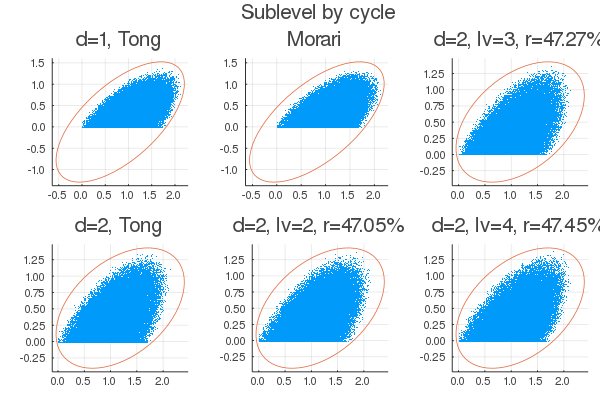

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [5]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "tong", L1);
p12 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "tong", L1);
# p21 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "jean", L1);
# p22 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "jean", L1);
p21, m = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "Morari", L1);
p22 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=2, morari=m, meth="cycle_v");
# p31 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "split", L1);
# p32 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "split", L1);
p13 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=3, morari=m, meth="cycle_v");
p23 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=4, morari=m, meth="cycle_v");
# p33 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=5, morari=m, meth="cycle_v");
# p1 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=6, morari=m, meth="cycle_v");
# p2 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=7, morari=m, meth="cycle_v");

title = plot(title="Sublevel by cycle", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p13, p12, p22, p23, layout = @layout([A{0.01h}; grid(2,3)]), fmt = :png)

### Sublevel hierarchy by order

Optimal value: 0.67, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.02.
Optimal value: 0.99, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.44.
Optimal value: 0.67, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.00.
Optimal value: 0.89, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.19.
Optimal value: 0.91, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.58.
Optimal value: 0.94, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.80.
Optimal value: 0.94, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.17.
Optimal value: 0.95, termination status: SLOW_PROGRESS, primal sta

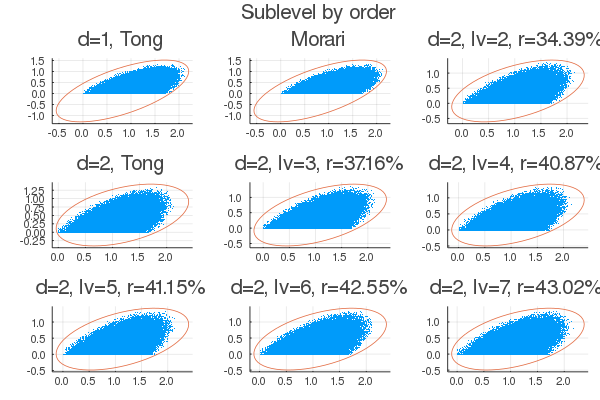

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [6]:
# plot original graph and image under ReLU
p22 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=2, morari=m, meth="order_v");
# p31 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "split", L1);
# p32 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "split", L1);
p13 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=3, morari=m, meth="order_v");
p23 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=4, morari=m, meth="order_v");
p33 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=5, morari=m, meth="order_v");
p1 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=6, morari=m, meth="order_v");
p2 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=7, morari=m, meth="order_v");

title = plot(title="Sublevel by order", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p22, p12, p13, p23, p33, p1, p2, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

### Sublevel hierarchy randomly

Optimal value: 0.67, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.01.
Optimal value: 0.99, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.41.
Optimal value: 0.67, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.01.
Optimal value: 0.67, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.14.
Optimal value: 0.67, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.41.
Optimal value: 0.90, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.16.
Optimal value: 0.73, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.42.
Optimal value: 0.74, termination status: SLOW_PROGRESS, primal sta

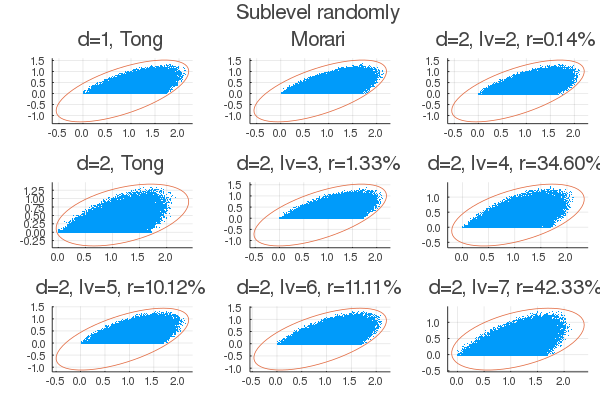

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [7]:
# plot original graph and image under ReLU
p22 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=2, morari=m, meth="random_v");
# p31 = OuterApproximationPlotSampling(Q01, b01, c01, 1, P1, ξ1, "split", L1);
# p32 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "split", L1);
p13 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=3, morari=m, meth="random_v");
p23 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=4, morari=m, meth="random_v");
p33 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=5, morari=m, meth="random_v");
p1 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=6, morari=m, meth="random_v");
p2 = OuterApproximationPlotSampling(Q01, b01, c01, 2, P1, ξ1, "sublevel", L1, lv=7, morari=m, meth="random_v");

title = plot(title="Sublevel randomly", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p22, p12, p13, p23, p33, p1, p2, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

## 1-hidden layer networks of type (20,2)

In [6]:
n = 20; Q02 = Matrix(-I(n)); b02 = zeros(n,1); c02 = 1;
L2 = 1; P2 = Array{Any}(undef, L2); ξ2 = Array{Any}(undef, L2);
for i = 1:L2-1
    P2[i] = rand(n,n)*0.5; ξ2[i] = rand(n,1);
    for j = 1:n
        P2[i][j,j] = 1
    end
end
P2[L2] = rand(2,n)*0.5; ξ2[L2] = rand(2,1); P2[L2][1,1] = 1; P2[L2][2,2] = 1;

### Sublevel hierarchy by cycle

Optimal value: 0.58, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.02.
Optimal value: 0.74, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 168.45.
Optimal value: 0.58, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.01.
Optimal value: 0.73, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 6.75.
Optimal value: 0.73, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 8.27.
Optimal value: 0.74, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 13.98.


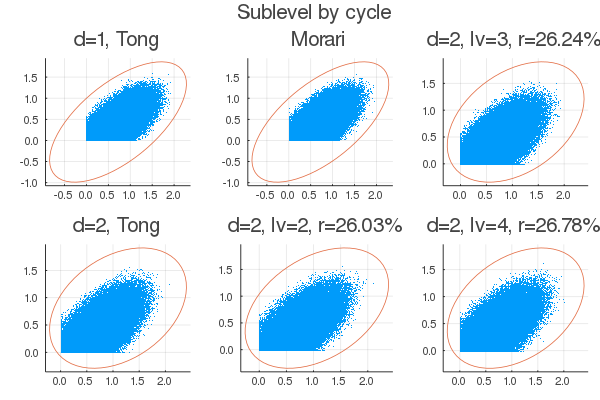

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [7]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "tong", L2);
p12 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "tong", L2);
# p21 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "jean", L2);
# p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "jean", L2);
p21, m = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "Morari", L2);
p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=2, morari=m, meth="cycle_v");
# p31 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "split", L2);
# p32 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "split", L2);
p13 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=3, morari=m, meth="cycle_v");
p23 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=4, morari=m, meth="cycle_v");
# p33 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=5, morari=m, meth="cycle_v");
# p1 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=6, morari=m, meth="cycle_v");
# p2 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=7, morari=m, meth="cycle_v");

title = plot(title="Sublevel by cycle", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p13, p12, p22, p23, layout = @layout([A{0.01h}; grid(2,3)]), fmt = :png)

### Sublevel hierarchy by order

Optimal value: 0.58, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.01.
Optimal value: 0.74, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 173.47.
Optimal value: 0.58, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.01.
Optimal value: 0.65, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.52.
Optimal value: 0.65, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.02.
Optimal value: 0.67, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 2.61.
Optimal value: 0.67, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 7.80.
Optimal value: 0.68, termination status: SLOW_PROGRESS, primal s

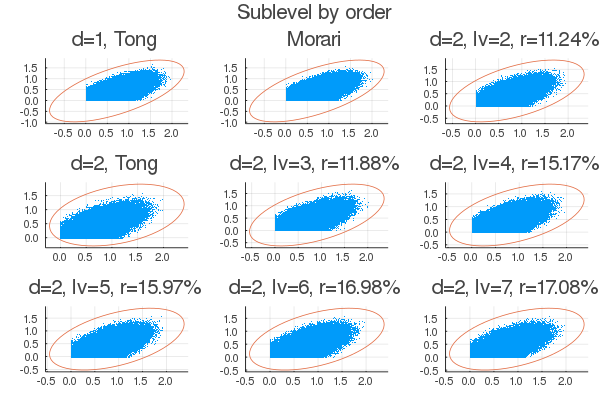

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [8]:
# plot original graph and image under ReLU
p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=2, morari=m, meth="order_v");
# p31 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "split", L2);
# p32 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "split", L2);
p13 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=3, morari=m, meth="order_v");
p23 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=4, morari=m, meth="order_v");
p33 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=5, morari=m, meth="order_v");
p1 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=6, morari=m, meth="order_v");
p2 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=7, morari=m, meth="order_v");

title = plot(title="Sublevel by order", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p22, p12, p13, p23, p33, p1, p2, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

### Sublevel hierarchy randomly

Optimal value: 0.58, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.01.
Optimal value: 0.74, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 189.89.
Optimal value: 0.58, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.03.
Optimal value: 0.58, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.77.
Optimal value: 0.58, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.50.
Optimal value: 0.58, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.53.
Optimal value: 0.58, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 6.88.
Optimal value: 0.60, termination status: SLOW_PROGRESS, primal status:

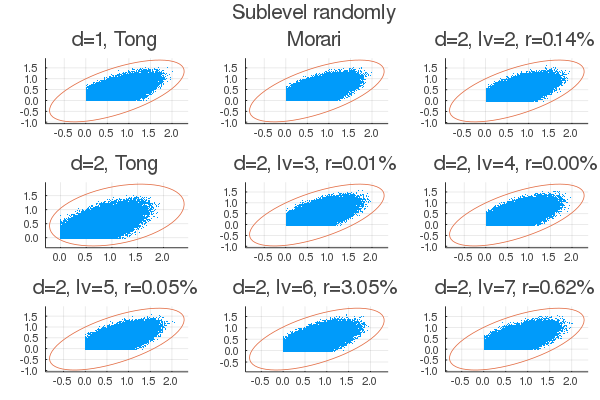

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [9]:
# plot original graph and image under ReLU
p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=2, morari=m, meth="random_v");
# p31 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "split", L2);
# p32 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "split", L2);
p13 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=3, morari=m, meth="random_v");
p23 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=4, morari=m, meth="random_v");
p33 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=5, morari=m, meth="random_v");
p1 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=6, morari=m, meth="random_v");
p2 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=7, morari=m, meth="random_v");

title = plot(title="Sublevel randomly", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p22, p12, p13, p23, p33, p1, p2, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

## 1-hidden layer networks of type (40,2)

In [7]:
n = 40; Q02 = Matrix(-I(n)); b02 = zeros(n,1); c02 = 1;
L2 = 1; P2 = Array{Any}(undef, L2); ξ2 = Array{Any}(undef, L2);
for i = 1:L2-1
    P2[i] = rand(n,n)*0.5; ξ2[i] = rand(n,1);
    for j = 1:n
        P2[i][j,j] = 1
    end
end
P2[L2] = rand(2,n)*0.5; ξ2[L2] = rand(2,1); P2[L2][1,1] = 1; P2[L2][2,2] = 1;

### Sublevel hierarchy by cycle

Optimal value: 0.32, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.19.
Optimal value: 0.44, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 159.86.
Optimal value: 0.44, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 167.88.
Optimal value: 0.45, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 260.47.


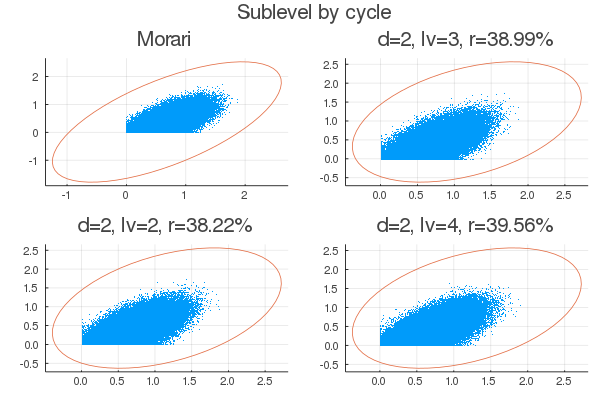

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [8]:
# plot original graph and image under ReLU
p11 = plot();
p12 = plot();
# p21 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "jean", L2);
# p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "jean", L2);
p21, m = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "Morari", L2);
p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=2, morari=m, meth="cycle_v");
# p31 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "split", L2);
# p32 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "split", L2);
p13 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=3, morari=m, meth="cycle_v");
p23 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=4, morari=m, meth="cycle_v");
# p33 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=5, morari=m, meth="cycle_v");
# p1 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=6, morari=m, meth="cycle_v");
# p2 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=7, morari=m, meth="cycle_v");

title = plot(title="Sublevel by cycle", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p21, p13, p22, p23, layout = @layout([A{0.01h}; grid(2,2)]), fmt = :png)

### Sublevel hierarchy by order

Optimal value: 0.34, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 2.20.
Optimal value: 0.35, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 3.67.
Optimal value: 0.35, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 9.95.
Optimal value: 0.35, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 20.53.
Optimal value: 0.35, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 37.61.
Optimal value: 0.35, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 107.08.


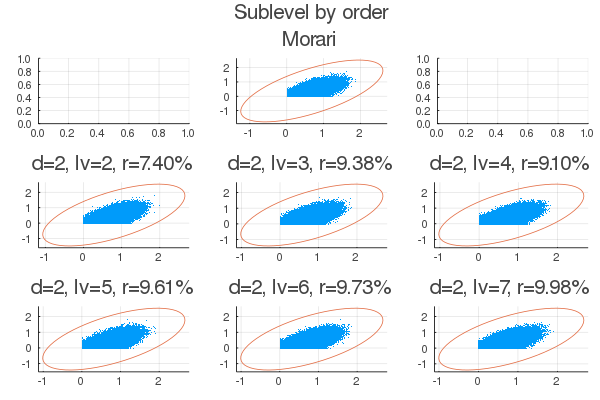

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [9]:
# plot original graph and image under ReLU
p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=2, morari=m, meth="order_v");
p13 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=3, morari=m, meth="order_v");
p23 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=4, morari=m, meth="order_v");
p33 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=5, morari=m, meth="order_v");
p1 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=6, morari=m, meth="order_v");
p2 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=7, morari=m, meth="order_v");

title = plot(title="Sublevel by order", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p12, p22, p13, p23, p33, p1, p2, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

### Sublevel hierarchy randomly

Optimal value: 0.32, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.13.
Optimal value: 0.32, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 3.06.
Optimal value: 0.32, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 5.78.
Optimal value: 0.32, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 13.28.
Optimal value: 0.32, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 25.70.
Optimal value: 0.32, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 48.09.


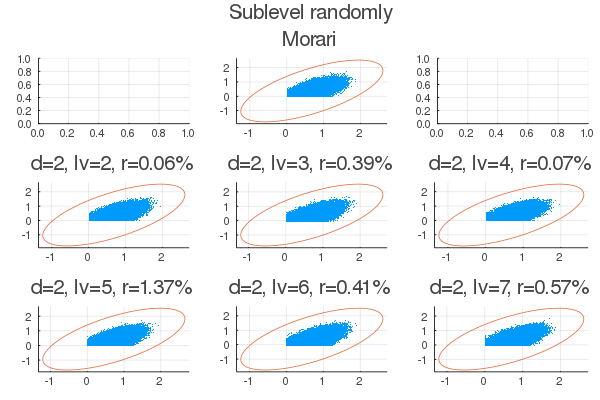

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [10]:
# plot original graph and image under ReLU
p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=2, morari=m, meth="random_v");
p13 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=3, morari=m, meth="random_v");
p23 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=4, morari=m, meth="random_v");
p33 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=5, morari=m, meth="random_v");
p1 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=6, morari=m, meth="random_v");
p2 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=7, morari=m, meth="random_v");

title = plot(title="Sublevel randomly", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p12, p22, p13, p23, p33, p1, p2, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

In [14]:
# n = 2; Q02 = Matrix(-I(n)); b02 = zeros(n,1); c02 = 1;
# L2 = 2; P2 = Array{Any}(undef, L2); ξ2 = Array{Any}(undef, L2);
# for i = 1:L2-1
#     P2[i] = rand(n,n)*0.1; ξ2[i] = rand(n,1);
#     for j = 1:n
#         P2[i][j,j] = 1
#     end
# end
# P2[L2] = rand(2,n)*0.1; ξ2[L2] = rand(2,1); P2[L2][1,1] = 1; P2[L2][2,2] = 1;

In [58]:
# # plot original graph and image under ReLU
# p11 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "tong", L2);
# # p21 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "jean", L2);
# p21, m = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "Morari", L2);
# # p31 = OuterApproximationPlotSampling(Q02, b02, c02, 1, P2, ξ2, "split", L2);
# p12 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "tong", L2);
# # p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "jean", L2);
# p22 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=1, morari=m);
# # p32 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "split", L2);
# # p13 = OuterApproximationPlotSampling(Q02, b02, c02, 3, P2, ξ2, "tong", L2);
# # p23 = OuterApproximationPlotSampling(Q02, b02, c02, 3, P2, ξ2, "jean", L2);
# p23 = OuterApproximationPlotSampling(Q02, b02, c02, 2, P2, ξ2, "sublevel", L2, lv=2, morari=m);
# # p33 = OuterApproximationPlotSampling(Q02, b02, c02, 3, P2, ξ2, "split", L2);
# p = plot()

# plot(p11, p21, p22, p12, p, p23, layout = grid(2,3), fmt = :png)

In [16]:
# n = 3; Q03 = Matrix(-I(n)); b03 = zeros(n,1); c03 = 1;
# L3 = 2; P3 = Array{Any}(undef, L3); ξ3 = Array{Any}(undef, L3);
# for i = 1:L3-1
#     P3[i] = rand(n,n)*0.2; ξ3[i] = rand(n,1);
#     for j = 1:n
#         P3[i][j,j] = 1
#     end
# end
# P3[L3] = rand(2,n)*0.2; ξ3[L3] = rand(2,1); P3[L3][1,1] = 1; P3[L3][2,2] = 1;

In [59]:
# # plot original graph and image under ReLU
# p11 = OuterApproximationPlotSampling(Q03, b03, c03, 1, P3, ξ3, "tong", L3);
# # p21 = OuterApproximationPlotSampling(Q03, b03, c03, 1, P3, ξ3, "jean", L3);
# p21, m = OuterApproximationPlotSampling(Q03, b03, c03, 1, P3, ξ3, "Morari", L3);
# p31 = OuterApproximationPlotSampling(Q03, b03, c03, 1, P3, ξ3, "split", L3);
# p12 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "tong", L3);
# # p22 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "jean", L3);
# p22 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "sublevel", L3, lv=2, morari=m);
# p32 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "split", L3);
# p13 = OuterApproximationPlotSampling(Q03, b03, c03, 3, P3, ξ3, "tong", L3);
# # p23 = OuterApproximationPlotSampling(Q03, b03, c03, 3, P3, ξ3, "jean", L3);
# p23 = OuterApproximationPlotSampling(Q03, b03, c03, 2, P3, ξ3, "sublevel", L3, lv=3, morari=m);
# p33 = OuterApproximationPlotSampling(Q03, b03, c03, 3, P3, ξ3, "split", L3);

# plot(p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = grid(3,3), fmt = :png)

## 2-hidden layer networks of type (5,5,2)

In [35]:
n = 5; Q05 = Matrix(-I(n)); b05 = zeros(n,1); c05 = 1;
L5 = 2; P5 = Array{Any}(undef, L5); ξ5 = Array{Any}(undef, L5);
for i = 1:L5-1
    P5[i] = rand(n,n)*0.3; ξ5[i] = rand(n,1);
    for j = 1:n
        P5[i][j,j] = 1
    end
end
P5[L5] = rand(2,n)*0.3; ξ5[L5] = rand(2,1); P5[L5][1,1] = 1; P5[L5][2,2] = 1;

### Sublevel hierarchy by cycle

Optimal value: 0.92, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.00.
Optimal value: 1.34, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.36.


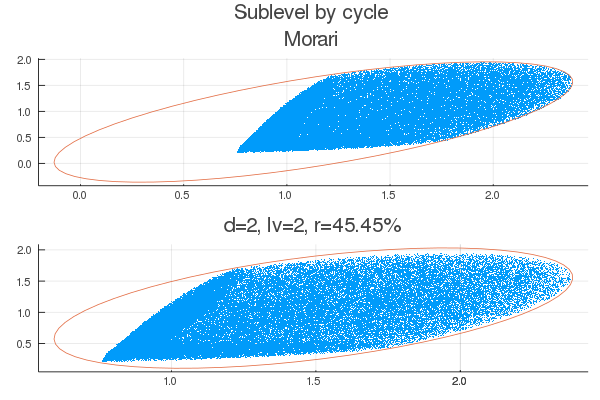

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [36]:
# plot original graph and image under ReLU
# p11 = OuterApproximationPlotSampling(Q05, b05, c05, 1, P5, ξ5, "tong", L5);
# p21 = OuterApproximationPlotSampling(Q05, b05, c05, 1, P5, ξ5, "jean", L5);
p21, m = OuterApproximationPlotSampling(Q05, b05, c05, 1, P5, ξ5, "Morari", L5);
# p31 = OuterApproximationPlotSampling(Q05, b05, c05, 1, P5, ξ5, "split", L5);
p31 = plot()
# p12 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "tong", L5);
# p22 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "jean", L5);
p22 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=2, morari=m, meth="cycle_v");
# p32 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "split", L5);
p32 = plot()
# p13 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=3, morari=m, meth="cycle_v");
# p23 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=4, morari=m, meth="cycle_v");
# p33 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=5, morari=m, meth="cycle_v");

title = plot(title="Sublevel by cycle", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p21, p22, layout = @layout([A{0.01h}; grid(2,1)]), fmt = :png)

### Sublevel hierarchy by order

Optimal value: 0.92, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.02.
Optimal value: 1.29, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.28.
Optimal value: 1.32, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.39.
Optimal value: 1.33, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.58.
Optimal value: 1.35, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.72.


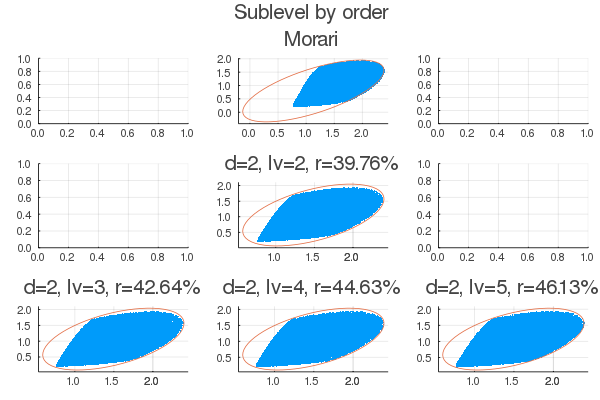

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [37]:
# plot original graph and image under ReLU
p11 = plot();
p31 = plot()
p12 = plot();
p22 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=2, morari=m, meth="order_v");
p32 = plot()
p13 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=3, morari=m, meth="order_v");
p23 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=4, morari=m, meth="order_v");
p33 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=5, morari=m, meth="order_v");

title = plot(title="Sublevel by order", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

### Sublevel hierarchy randomly

Optimal value: 0.92, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.00.
Optimal value: 0.94, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.23.
Optimal value: 0.95, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.63.
Optimal value: 1.33, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.45.
Optimal value: 1.35, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.74.


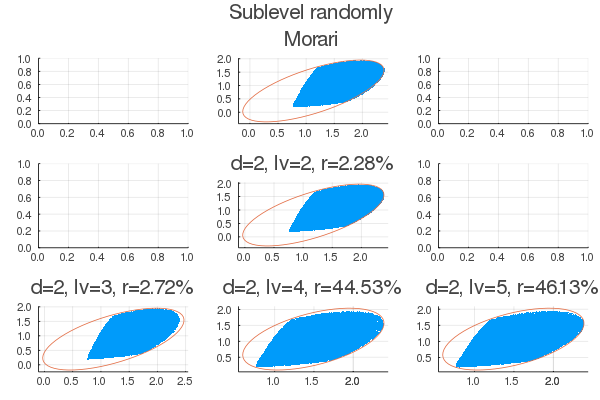

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [38]:
# plot original graph and image under ReLU
p11 = plot();
p31 = plot()
p12 = plot();
p22 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=2, morari=m, meth="random_v");
p32 = plot()
p13 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=3, morari=m, meth="random_v");
p23 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=4, morari=m, meth="random_v");
p33 = OuterApproximationPlotSampling(Q05, b05, c05, 2, P5, ξ5, "sublevel", L5, lv=5, morari=m, meth="random_v");

title = plot(title="Sublevel randomly", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

## 2-hidden layer networks of type (7,7,2)

In [20]:
n = 7; Q07 = Matrix(-I(n)); b07 = zeros(n,1); c07 = 1;
L7 = 2; P7 = Array{Any}(undef, L7); ξ7 = Array{Any}(undef, L7);
for i = 1:L7-1
    P7[i] = randn(n,n)*0.4; ξ7[i] = randn(n,1);
    for j = 1:n
        P7[i][j,j] = 1
    end
end
P7[L7] = rand(2,n)*0.4; ξ7[L7] = rand(2,1); P7[L7][1,1] = 1; P7[L7][2,2] = 1;

### Sublevel hierarchy by cycle

Optimal value: 0.29, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.02.
Optimal value: 1.53, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.50.
Optimal value: 1.65, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.42.
Optimal value: 1.78, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 2.66.
Optimal value: 1.82, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 2.95.
Optimal value: 1.83, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 2.61.


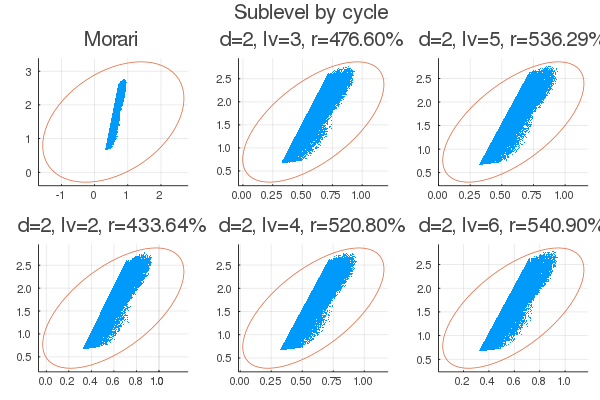

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [34]:
# plot original graph and image under ReLU
p11 = plot();
# p21 = OuterApproximationPlotSampling(Q07, b07, c07, 1, P7, ξ7, "jean", L7);
p21, m = OuterApproximationPlotSampling(Q07, b07, c07, 1, P7, ξ7, "Morari", L7);
p31 = plot();
p12 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=2, morari=m, meth="cycle_v");
# p22 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "jean", L7);
p22 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=3, morari=m, meth="cycle_v");
p32 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=4, morari=m, meth="cycle_v");
p13 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=5, morari=m, meth="cycle_v");
p23 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=6, morari=m, meth="cycle_v");
# p33 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=7, morari=m, meth="cycle_v");

title = plot(title="Sublevel by cycle", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p21, p22, p13, p12, p32, p23, layout = @layout([A{0.01h}; grid(2,3)]), fmt = :png)

### Sublevel hierarchy by order

Optimal value: 0.29, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.02.
Optimal value: 0.53, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.50.
Optimal value: 0.62, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.95.
Optimal value: 0.98, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.73.
Optimal value: 1.12, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 3.81.
Optimal value: 1.51, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 2.83.
Optimal value: 1.83, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 17.92.


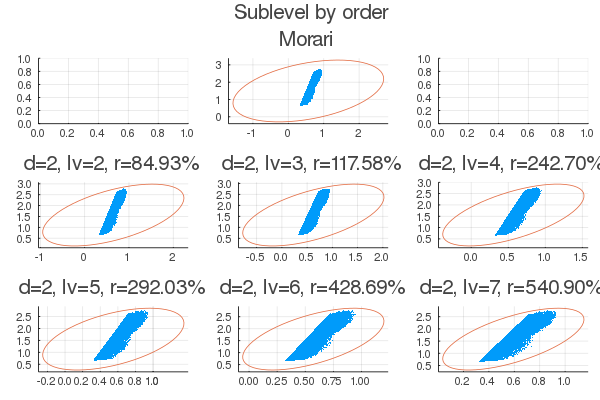

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [23]:
# plot original graph and image under ReLU
p11 = plot();
p31 = plot();
p12 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=2, morari=m, meth="order_v");
p22 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=3, morari=m, meth="order_v");
p32 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=4, morari=m, meth="order_v");
p13 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=5, morari=m, meth="order_v");
p23 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=6, morari=m, meth="order_v");
p33 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=7, morari=m, meth="order_v");

title = plot(title="Sublevel by order", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

### Sublevel hierarchy randomly

Optimal value: 0.29, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.00.
Optimal value: 0.34, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.91.
Optimal value: 0.36, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.36.
Optimal value: 0.46, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 2.14.
Optimal value: 0.79, termination status: SLOW_PROGRESS, primal status: UNKNOWN_RESULT_STATUS, dual status: UNKNOWN_RESULT_STATUS, solving time: 3.80.
Optimal value: 1.00, termination status: SLOW_PROGRESS, primal status: UNKNOWN_RESULT_STATUS, dual status: UNKNOWN_RESULT_STATUS, solving time: 3.66.
Optimal value: 1.83, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 20.38.


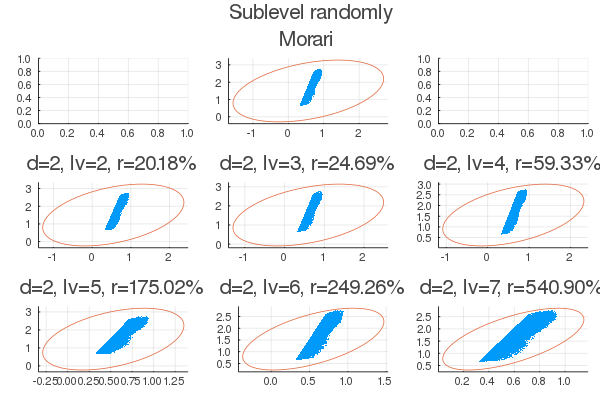

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [26]:
# plot original graph and image under ReLU
p11 = plot();
p31 = plot();
p12 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=2, morari=m, meth="random_v");
p22 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=3, morari=m, meth="random_v");
p32 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=4, morari=m, meth="random_v");
p13 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=5, morari=m, meth="random_v");
p23 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=6, morari=m, meth="random_v");
p33 = OuterApproximationPlotSampling(Q07, b07, c07, 2, P7, ξ7, "sublevel", L7, lv=7, morari=m, meth="random_v");

title = plot(title="Sublevel randomly", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

## 2-hidden layer networks of type (10,10,2)

In [27]:
n = 10; Q10 = Matrix(-I(n)); b10 = zeros(n,1); c10 = 1;
L10 = 2; P10 = Array{Any}(undef, L10); ξ10 = Array{Any}(undef, L10);
for i = 1:L10-1
    P10[i] = randn(n,n)*0.5; ξ10[i] = randn(n,1);
    for j = 1:n
        P10[i][j,j] = 1
    end
end
P10[L10] = rand(2,n)*0.5; ξ10[L10] = rand(2,1); P10[L10][1,1] = 1; P10[L10][2,2] = 1;

### Sublevel hierarchy by cycle

Optimal value: 0.18, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.03.
Optimal value: 0.78, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 6.64.
Optimal value: 0.83, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 9.59.
Optimal value: 0.87, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 12.70.
Optimal value: 0.92, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 17.89.
Optimal value: 0.93, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 20.64.


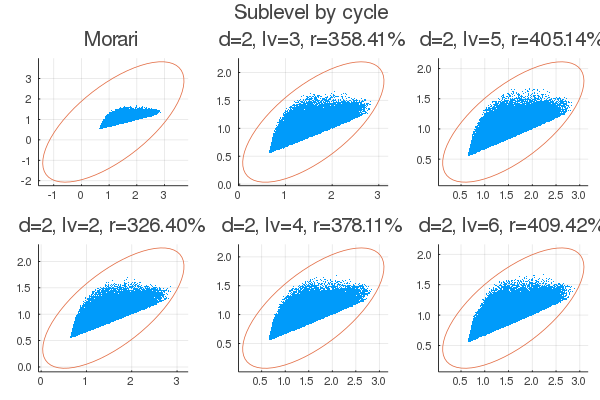

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [40]:
# plot original graph and image under ReLU
p11 = plot();
# p21 = OuterApproximationPlotSampling(Q10, b10, c10, 1, P10, ξ10, "jean", L10);
p21, m = OuterApproximationPlotSampling(Q10, b10, c10, 1, P10, ξ10, "Morari", L10);
p31 = plot();
p12 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=2, morari=m, meth="cycle_v");
# p22 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "jean", L10);
p22 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=3, morari=m, meth="cycle_v");
p32 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=4, morari=m, meth="cycle_v");
p13 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=5, morari=m, meth="cycle_v");
p23 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=6, morari=m, meth="cycle_v");
# p33 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=7, morari=m, meth="cycle");

title = plot(title="Sublevel by cycle", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p21, p22, p13, p12, p32, p23, layout = @layout([A{0.01h}; grid(2,3)]), fmt = :png)

### Sublevel hierarchy by order

Optimal value: 0.18, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.03.
Optimal value: 0.31, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.67.
Optimal value: 0.35, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 3.19.
Optimal value: 0.39, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 5.50.
Optimal value: 0.48, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 11.83.
Optimal value: 0.48, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 17.28.
Optimal value: 0.50, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 28.52.


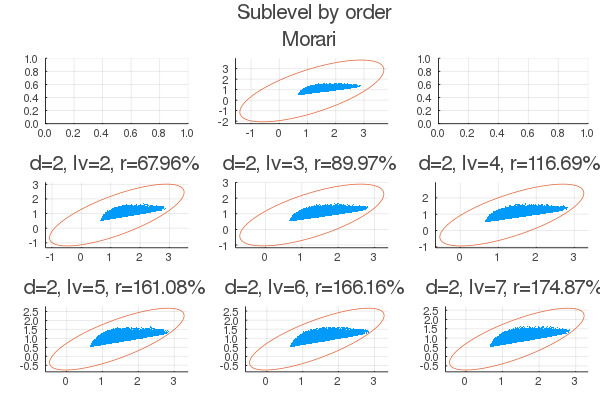

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [29]:
# plot original graph and image under ReLU
p11 = plot();
p31 = plot();
p12 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=2, morari=m, meth="order_v");
p22 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=3, morari=m, meth="order_v");
p32 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=4, morari=m, meth="order_v");
p13 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=5, morari=m, meth="order_v");
p23 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=6, morari=m, meth="order_v");
p33 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=7, morari=m, meth="order_v");

title = plot(title="Sublevel by order", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

### Sublevel hierarchy randomly

Optimal value: 0.18, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.05.
Optimal value: 0.19, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 1.45.
Optimal value: 0.21, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 3.73.
Optimal value: 0.23, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 5.56.
Optimal value: 0.27, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 11.19.
Optimal value: 0.39, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 20.94.
Optimal value: 0.34, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 25.97.


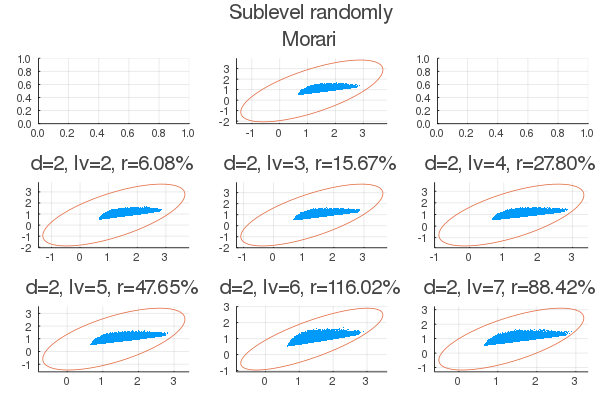

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [30]:
# plot original graph and image under ReLU
p11 = plot();
p31 = plot();
p12 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=2, morari=m, meth="random_v");
p22 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=3, morari=m, meth="random_v");
p32 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=4, morari=m, meth="random_v");
p13 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=5, morari=m, meth="random_v");
p23 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=6, morari=m, meth="random_v");
p33 = OuterApproximationPlotSampling(Q10, b10, c10, 2, P10, ξ10, "sublevel", L10, lv=7, morari=m, meth="random_v");

title = plot(title="Sublevel randomly", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

## 2-hidden layer networks of type (15,15,2)

In [10]:
n = 15; Q15 = Matrix(-I(n)); b15 = zeros(n,1); c15 = 1;
L15 = 2; P15 = Array{Any}(undef, L15); ξ15 = Array{Any}(undef, L15);
for i = 1:L15-1
    P15[i] = randn(n,n)*0.5; ξ15[i] = randn(n,1);
    for j = 1:n
        P15[i][j,j] = 1
    end
end
P15[L15] = rand(2,n)*0.5; ξ15[L15] = rand(2,1); P15[L15][1,1] = 1; P15[L15][2,2] = 1;

### Sublevel hierarchy by cycle

Optimal value: 0.13, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.11.


┌ Warning: The addition operator has been used on JuMP expressions a large number of times. This warning is safe to ignore but may indicate that model generation is slower than necessary. For performance reasons, you should not add expressions in a loop. Instead of x += y, use add_to_expression!(x,y) to modify x in place. If y is a single variable, you may also use add_to_expression!(x, coef, y) for x += coef*y.
└ @ JuMP C:\Users\ct779\.julia\packages\JuMP\MsUSY\src\JuMP.jl:747


Optimal value: 0.23, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 40.08.
Optimal value: 0.23, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 56.80.
Optimal value: 0.23, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 82.63.
Optimal value: 0.24, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 130.56.
Optimal value: 0.24, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 164.17.


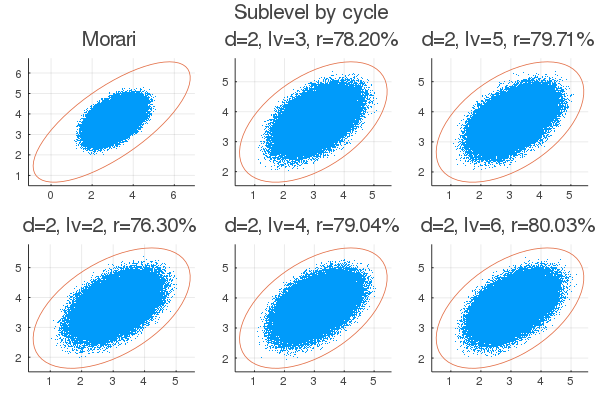

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [11]:
# plot original graph and image under ReLU
# p21 = OuterApproximationPlotSampling(Q15, b15, c15, 1, P15, ξ15, "jean", L15);
p21, m = OuterApproximationPlotSampling(Q15, b15, c15, 1, P15, ξ15, "Morari", L15);
p11 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=2, morari=m, meth="cycle_v");
p31 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=3, morari=m, meth="cycle_v");
p12 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=4, morari=m, meth="cycle_v");
# # p22 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "jean", L15);
p22 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=5, morari=m, meth="cycle_v");
p32 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=6, morari=m, meth="cycle_v");
# p13 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=7, morari=m, meth="cycle_v");
# p23 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=8, morari=m, meth="cycle_v");
# p33 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=9, morari=m, meth="cycle_v");

title = plot(title="Sublevel by cycle", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p21, p31, p22, p11, p12, p32, layout = @layout([A{0.01h}; grid(2,3)]), fmt = :png)

### Sublevel hierarchy by order

Optimal value: 0.13, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.11.
Optimal value: 0.16, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 3.14.
Optimal value: 0.17, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 6.47.
Optimal value: 0.17, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 16.91.
Optimal value: 0.17, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 31.83.
Optimal value: 0.18, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 58.09.
Optimal value: 0.18, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 124.31.
Optimal value: 0.21, termination status: SLOW_PRO

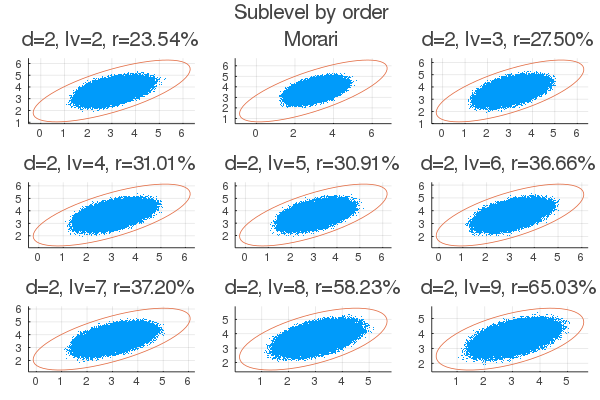

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [12]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=2, morari=m, meth="order_v");
p31 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=3, morari=m, meth="order_v");
p12 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=4, morari=m, meth="order_v");
p22 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=5, morari=m, meth="order_v");
p32 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=6, morari=m, meth="order_v");
p13 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=7, morari=m, meth="order_v");
p23 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=8, morari=m, meth="order_v");
p33 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=9, morari=m, meth="order_v");

title = plot(title="Sublevel by order", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

### Sublevel hierarchy randomly

Optimal value: 0.13, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.11.
Optimal value: 0.15, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 3.19.
Optimal value: 0.15, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 7.66.
Optimal value: 0.15, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 17.44.
Optimal value: 0.16, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 36.36.
Optimal value: 0.18, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 71.28.
Optimal value: 0.18, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 118.63.
Optimal value: 0.20, termination status: SLOW_PRO

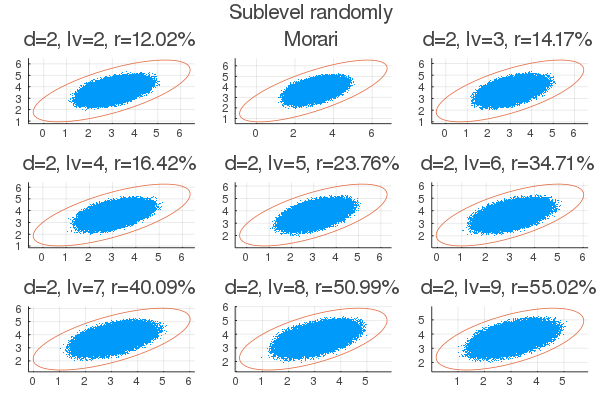

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [13]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=2, morari=m, meth="random_v");
p31 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=3, morari=m, meth="random_v");
p12 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=4, morari=m, meth="random_v");
p22 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=5, morari=m, meth="random_v");
p32 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=6, morari=m, meth="random_v");
p13 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=7, morari=m, meth="random_v");
p23 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=8, morari=m, meth="random_v");
p33 = OuterApproximationPlotSampling(Q15, b15, c15, 2, P15, ξ15, "sublevel", L15, lv=9, morari=m, meth="random_v");

title = plot(title="Sublevel randomly", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

## 2-hidden layer networks of type (20,20,2)

In [2]:
n = 20; Q20 = Matrix(-I(n)); b20 = zeros(n,1); c20 = 1;
L20 = 2; P20 = Array{Any}(undef, L20); ξ20 = Array{Any}(undef, L20);
for i = 1:L20-1
    P20[i] = randn(n,n)*0.5; ξ20[i] = randn(n,1);
    for j = 1:n
        P20[i][j,j] = 1
    end
end
P20[L20] = rand(2,n)*0.5; ξ20[L20] = rand(2,1); P20[L20][1,1] = 1; P20[L20][2,2] = 1;

### Sublevel hierarchy by cycle

Optimal value: 

┌ Warning: The addition operator has been used on JuMP expressions a large number of times. This warning is safe to ignore but may indicate that model generation is slower than necessary. For performance reasons, you should not add expressions in a loop. Instead of x += y, use add_to_expression!(x,y) to modify x in place. If y is a single variable, you may also use add_to_expression!(x, coef, y) for x += coef*y.
└ @ JuMP C:\Users\ct779\.julia\packages\JuMP\MsUSY\src\JuMP.jl:747


0.07, termination status: OPTIMAL, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 0.31.
Optimal value: 0.16, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 190.38.
Optimal value: 0.18, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 183.81.
Optimal value: 0.17, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 292.80.
Optimal value: 0.17, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 555.86.
Optimal value: 0.17, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 796.75.


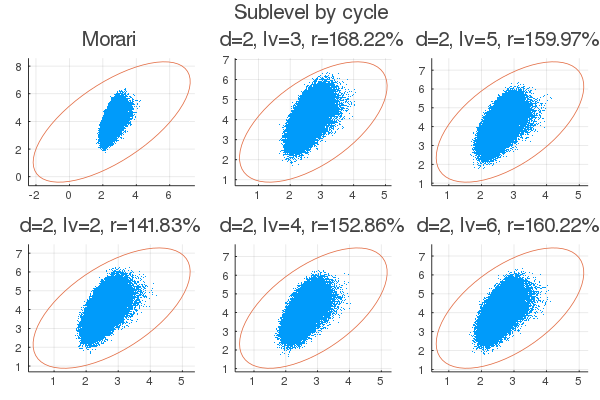

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [3]:
# plot original graph and image under ReLU
p21, m = OuterApproximationPlotSampling(Q20, b20, c20, 1, P20, ξ20, "Morari", L20);
p11 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=2, morari=m, meth="cycle_v");
p31 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=3, morari=m, meth="cycle_v");
p12 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=4, morari=m, meth="cycle_v");
p22 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=5, morari=m, meth="cycle_v");
p32 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=6, morari=m, meth="cycle_v");
# p13 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=7, morari=m, meth="cycle_v");
# p23 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=8, morari=m, meth="cycle_v");
# p33 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=9, morari=m, meth="cycle_v");

title = plot(title="Sublevel by cycle", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p21, p31, p22, p11, p12, p32, layout = @layout([A{0.01h}; grid(2,3)]), fmt = :png)

### Sublevel hierarchy by order

Optimal value: 0.08, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 6.53.
Optimal value: 0.09, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 12.86.
Optimal value: 0.09, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 29.86.
Optimal value: 0.09, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 80.30.
Optimal value: 0.10, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 121.08.
Optimal value: 0.10, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 282.01.
Optimal value: 0.11, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 594.49.


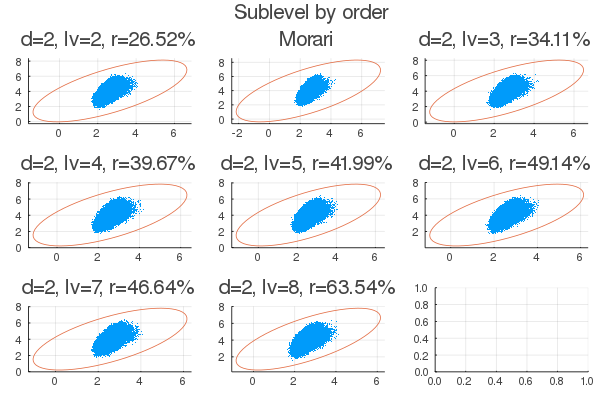

In [4]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=2, morari=m, meth="order_v");
p31 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=3, morari=m, meth="order_v");
p12 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=4, morari=m, meth="order_v");
p22 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=5, morari=m, meth="order_v");
p32 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=6, morari=m, meth="order_v");
p13 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=7, morari=m, meth="order_v");
p23 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=8, morari=m, meth="order_v");
p33 = plot();

title = plot(title="Sublevel by order", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

### Sublevel hierarchy randomly

Optimal value: 0.07, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 7.06.


GKS: Rectangle definition is invalid in routine SET_VIEWPORT


Optimal value: 0.07, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 16.59.
Optimal value: 0.08, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 36.75.
Optimal value: 0.08, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 102.47.
Optimal value: 0.08, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 284.31.
Optimal value: 0.09, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 497.31.
Optimal value: 0.10, termination status: SLOW_PROGRESS, primal status: FEASIBLE_POINT, dual status: FEASIBLE_POINT, solving time: 934.05.


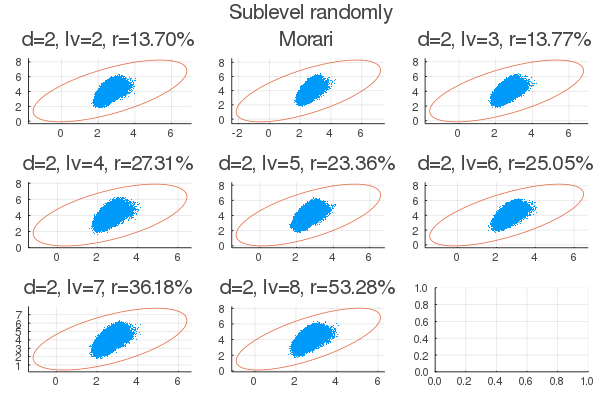

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [5]:
# plot original graph and image under ReLU
p11 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=2, morari=m, meth="random_v");
p31 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=3, morari=m, meth="random_v");
p12 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=4, morari=m, meth="random_v");
p22 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=5, morari=m, meth="random_v");
p32 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=6, morari=m, meth="random_v");
p13 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=7, morari=m, meth="random_v");
p23 = OuterApproximationPlotSampling(Q20, b20, c20, 2, P20, ξ20, "sublevel", L20, lv=8, morari=m, meth="random_v");
p33 = plot();

title = plot(title="Sublevel randomly", grid = false, showaxis = false, bottom_margin = -30Plots.px)
plot(title, p11, p21, p31, p12, p22, p32, p13, p23, p33, layout = @layout([A{0.01h}; grid(3,3)]), fmt = :png)

In [16]:
# b = [1; 0]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-.5,2.5), ylims = (-2.5,2.5))

In [17]:
# b = [1; 2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-.5,2.5), ylims = (-.5,4.5))

In [18]:
# b = [0; 2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-1.5,1.5), ylims = (-.5,4.5))

In [19]:
# b = [-1; 2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-2.5,1.5), ylims = (-.5,4.5))

In [20]:
# b = [-1; 0]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-2.5,1.5), ylims = (-2.5,2.5))

In [21]:
# b = [-1; -2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-2.5,1.5), ylims = (-4.5,2.5))

In [22]:
# b = [0; -2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-1.5,1.5), ylims = (-4.5,2.5))

In [23]:
# b = [1; -2]; Q0 = [-1 0; 0 -1/4]; b0 = -2*Q0*b; c0 = 1 + b'*Q0*b;

# # plot original graph and image under ReLU
# θ = 0:0.1:2*π+0.1
# F0 = eigen(Q0); P0 = F0.vectors; Γ0 = diagm(sqrt.(-F0.values));
# v0 = -1/2 * Q0^(-1) * b0; m0 = c0 - v0'*Q0*v0
# x11 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:]
# x12 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[1,:] .>= 0); 
# x21 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] 
# x22 = (sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .* ((sqrt(m0)*P0*Γ0^(-1)*[cos.(θ)'; sin.(θ)'].+v0)[2,:] .>= 0); 
# x1 = [x11 x12]; x2 = [x21 x22];
# p0 = plot(x1, x2, title = "Ellipsoid and its image by ReLU", label = ["Original Ellipsoid" "Image by ReLU"], legend=:outertopright)

# # plot image under ReLU and its 1st order approximation
# coeff1 = OuterApproximation(Q0, b0, c0, 1)
# Q1 = [coeff1[1] coeff1[2]/2; coeff1[2]/2 coeff1[3]]; b1 = [coeff1[4]; coeff1[5]]; c1 = coeff1[6];
# @printf("Q1 = "); println(Q1); @printf("b1 = "); println(b1);  @printf("c1 = %f\n", c1)
# @printf("Determinant: %f\n", det(-Q1))
# p1 = OuterApproximationPlot(Q0, b0, c0, coeff1, 1);

# # plot image under ReLU and its 2nd order approximation
# coeff2 = OuterApproximation(Q0, b0, c0, 2)
# Q2 = [coeff2[1] coeff2[2]/2; coeff2[2]/2 coeff2[3]]; b2 = [coeff2[4]; coeff2[5]]; c2 = coeff2[6];
# @printf("Q2 = "); println(Q2); @printf("b2 = "); println(b2);  @printf("c2 = %f\n", c2)
# @printf("Determinant: %f\n", det(-Q2))
# p2 = OuterApproximationPlot(Q0, b0, c0, coeff2, 2);
# plot(p0, p1, p2, layout = grid(3, 1), xlims = (-.5,2.5), ylims = (-4.5,2.5))